<a href="https://colab.research.google.com/github/dmishra27/Web_Analytics_Topic_Modelling_Revealing_Discussions/blob/main/Web_Science_Topic_Modelling_Revealing_Discussions_Tweets(Grouped).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install preprocessor
# !pip install pyLDAvis
# !pip install matplotlib

# !pip install --upgrade pandas
# !pip install --upgrade ipython


In [32]:
#Import libraries
import warnings
warnings.filterwarnings("ignore")

import string
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import scipy.stats as stats

import preprocessor as p
from nltk.util import ngrams
import gensim
import nltk

from functools import reduce
from collections import Counter
from nltk.stem import WordNetLemmatizer
# import tweet-preprocessor

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

import spacy
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt


from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from gensim import corpora, models, similarities, matutils

from nltk.stem import WordNetLemmatizer
import re
import string
from pathlib import Path
import os, json
import glob
from nltk.corpus import stopwords

import gensim.corpora as corpora
from gensim.test.utils import common_corpus, common_dictionary

from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import simple_preprocess

import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
#Change working directory
# os.getcwd()
# os.chdir(r"C:\Files\Glasgow expenses\UofG_Sem2\Social_Web_Analytics\Coursework\Coursework_codes\Data\tweets")
# os.getcwd()
# workdir= os.getcwd()
# print("Directory changed")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:

# https://drive.google.com/file/d/19PVrFmT7yETFiZy5WFhn_vP1_tYbC8nE/view?usp=sharing

link = 'https://drive.google.com/open?id=19PVrFmT7yETFiZy5WFhn_vP1_tYbC8nE'


fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('groupedTweets.csv')
# df = pd.read_csv('sample_data.csv', dtype={'ID': str})
# print(df.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


19PVrFmT7yETFiZy5WFhn_vP1_tYbC8nE


In [5]:
#1- Read the input csv file "Multi pass clusterd(groupedTweets.csv)" to create a dataframe
#2- Attributes of dataframe created from singlepass file

df_orig = pd.read_csv("groupedTweets.csv")
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9968 entries, 0 to 9967
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   group     9968 non-null   int64  
 1   tweetID   9968 non-null   int64  
 2   username  9968 non-null   object 
 3   text      9968 non-null   object 
 4   qScore    9968 non-null   float64
 5   nScore    9968 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 467.4+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
#Display few records of original grouped tweets data
df_orig

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,group,tweetID,username,text,qScore,nScore
0,0,1621600585291014145,realJackEason,@pansexualflower Criterion certainly have US r...,0.613271,2.934114
1,0,1621600597127331842,battez,@StratAnalytica @EconguyRosie yeah I'm in UK j...,0.603617,1.712620
2,0,1621600609030782981,Reno_station,@NappaBald66 Dry clean eraser should do the tr...,0.669598,3.165340
3,0,1621600638256693252,pedrinho_uk,@alanvibe @DrHoenderkamp @haringeycouncil @mik...,0.543737,3.485828
4,0,1621600792812609541,ClimateSchmidt,"@PGDynes Climate change is a real problem, but...",0.609599,1.870719
...,...,...,...,...,...,...
9963,466,1621606007179812864,Quattro091275,@whiskytip @TheWhiskyNovice @BimberLondon Very...,0.569231,0.000000
9964,467,1621606023466258433,iansltx,So this means that in 2026 there'll be Ford vs...,0.607426,0.000000
9965,468,1621606075605680130,TheMooreOfNewry,Should be no fucking split about it. Terminate...,0.607125,1.180456
9966,469,1621606081884463106,athpaps7,How is Graham Potter starting havertz over Aub...,0.607810,1.712620


In [8]:
#Concatenating the tweet texts by grouping on the field('group'), so that one tweet is created per group

df = df_orig.groupby(['group'], as_index = False).agg({'text': ' '.join})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
#Displaying few records of the grouped dataframe after merging of tweets.
df.head()

,group,words,tokens
0,0,"[criterion, certainly, right, restoration, unl...",criterion certainly right restoration unlikely...
1,1,"[say, weather, balloon, deviate, course, say, ...",say weather balloon deviate course say militar...
2,2,"[begin, understand, children, operational, sch...",begin understand children operational scheme p...
3,3,"[excess, deaths, skyrocket, england, wales, de...",excess deaths skyrocket england wales deaths e...
4,4,"[scotland, seychelles, syria, south, africa, s...",scotland seychelles syria south africa south k...


In [39]:
#Attributes of the grouped dataframe after merging of tweets.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 469 entries, 0 to 470
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   group   469 non-null    int64 
 1   words   469 non-null    object
 2   tokens  469 non-null    object
dtypes: int64(1), object(2)
memory usage: 14.7+ KB


In [11]:
#All grouped tweet statistics on raw data (prior to text pre-processing)

#Getting all user tweet statistics on sibgle pass tweet as below:

#1 - Get input data statistics on single pass tweets data.
#a- No. of user tweets
#b - Max tweet length and the corresponding tweet text
#c - Min tweet length and the corresponding tweet text
#d- Avg. tweet length
#e - Avg. no of words per tweet
#f- Longest tweet text
#g - Smallest tweet text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
unique_no_tweets = len(df.index)
print("Total no of unique tweets:", "%d" % (unique_no_tweets))

all_words = [word for tokens in df['text'] for word in tokens]
vocab = sorted(list(set(all_words)))

# tweet_lengths = [len(tokens) for tokens in df['text']]
# tweetstr = df['text']
# tweet_length = len(df['text'].split())

tweet_length = df['text'].str.split().str.len()

total_no_tokens = len(all_words)
vocab_size = len(vocab)
max_tweet_len = max(tweet_length)
small_tweet_len = min(tweet_length)

print('{} tokens total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is:  {}'.format(max(tweet_length)))

# get longest tweet row index
indx_long_tweet = df["text"].str.len().idxmax()
long_tweet = df["text"][indx_long_tweet]

print('Min tweet length is:  {}'.format(min(tweet_length)))

#Average tweet length
avg_length = np.round(np.mean( df['text'].str.split().str.len()), 2)
print("Average tweet length is : ","%.0f" % avg_length)

# get shortest tweet row index
indx_small_tweet = df["text"].str.len().idxmin()
small_tweet =  df["text"][indx_small_tweet]

print("\n")
# get longest string value
print("Shortest tweet is: ", df["text"][indx_small_tweet])

print("\n")
# get longest tweet value
print("Largest tweet is: ", df["text"][indx_long_tweet])

#Put all the above statistics into a dataframe

tweet_stats = pd.DataFrame(columns=(['No_of_unique tweets', 'Total_no_of_tokens', 'Vocabulary_size', 'Maximum_tweet_length', 'Minimum_tweet_length', 'Average_tweet_length', 'Longest_tweet', 'Smallest_tweet']),index=[0])
tweet_stats['No_of_unique tweets'] = unique_no_tweets
tweet_stats['Total_no_of_tokens'] = total_no_tokens
tweet_stats['Vocabulary_size'] = vocab_size
tweet_stats['Maximum_tweet_length'] = max_tweet_len
tweet_stats['Minimum_tweet_length'] = small_tweet_len
tweet_stats['Average_tweet_length'] = avg_length
tweet_stats['Longest_tweet'] = long_tweet
tweet_stats['Smallest_tweet'] = small_tweet

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total no of unique tweets: 471
1523951 tokens total, with a vocabulary size of 1068
Max tweet length is:  22971
Min tweet length is:  4
Average tweet length is :  496


Shortest tweet is:  99p Ruddles in Spoons 👍🇬🇧👍🇬🇧👍🇬🇧


Largest tweet is:  George Santos – news: Secret tapes catch congressman admitting he ‘lied to everyone’ and giving Botox advice

Congressman admits he ‘obviously f***** up’ in new recording of his conversation with a prospective staffer
https://t.co/F6WMkinN2H . never getting over the fact road to show has an actual b plot that consists of yuukis secret american twin from new york stealing a purse &gt;&gt;&gt; ATTN: NEW YORK OVERSEAS VOTERS &lt;&lt;&lt;
Pls call your senators!! This bill is in committee - call or write all your NYS senator to get this on the floor for a vote. This bill would enable NY overseas voters to return their ballots electronically.
https://t.co/zrmWiNnoq2 dont hate on me because i dont take showers
i dont even get paid by the hour
new york ne

In [13]:
#Print grouped tweet stats dataset
tweet_stats.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,No_of_unique tweets,Total_no_of_tokens,Vocabulary_size,Maximum_tweet_length,Minimum_tweet_length,Average_tweet_length,Longest_tweet,Smallest_tweet
0,471,1523951,1068,22971,4,496.11,George Santos – news: Secret tapes catch congr...,99p Ruddles in Spoons 👍🇬🇧👍🇬🇧👍🇬🇧


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The percentage of retweets(mentions) in grouped data is 70.91% of all the tweets
The number of retweets(mentions) in grouped data is 334


The percentage of plain text tweets in grouped data is 16.99% of all the tweets
The number of plain text tweets in grouped data is 80


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


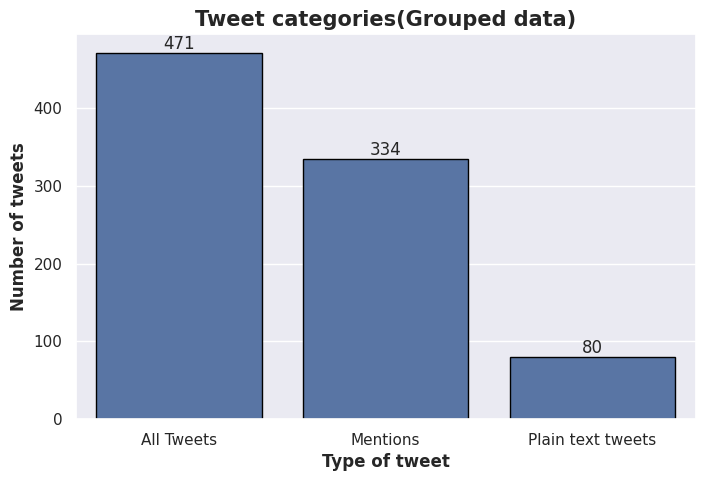

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


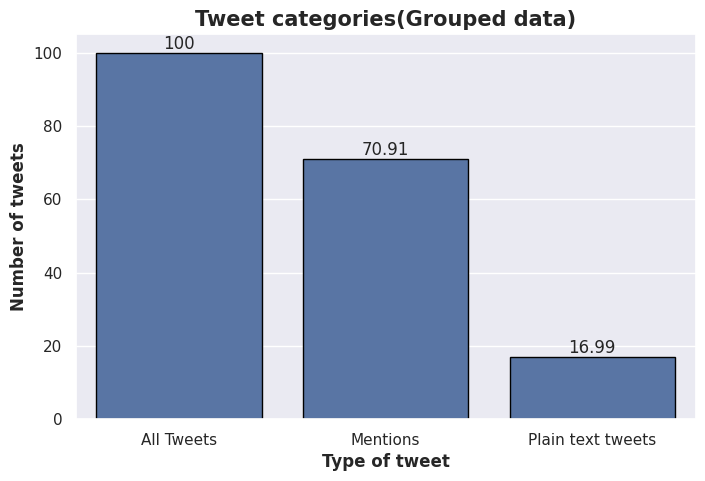

In [14]:
#See the percentage of tweets from the initial set that have #mentions and are not retweets:

mention_tweets = df[~df['text'].str.contains("RT")&df['text'].str.contains("@")]
perc_retweets = round((len(mention_tweets)/len(df)*100),2)

print(f"The percentage of retweets(mentions) in grouped data is {perc_retweets}% of all the tweets")
print(f"The number of retweets(mentions) in grouped data is {len(mention_tweets)}")
print('\n')

#See how many tweets inside are plain text tweets (No RT or mention)
plain_text_tweets = df[~df['text'].str.contains("@")  & ~df['text'].str.contains("RT")]
perc_plain_text_tweets = round((len(plain_text_tweets)/len(df)*100),2)

print(f"The percentage of plain text tweets in grouped data is {perc_plain_text_tweets}% of all the tweets")
print(f"The number of plain text tweets in grouped data is {len(plain_text_tweets)}")

#Plotting these different categories of tweets to see how all tweets are composed of
len_list = [ len(df), len(mention_tweets), len(plain_text_tweets)]
perc_list = [100, perc_retweets, perc_plain_text_tweets]
item_list = ['All Tweets', 'Mentions',  'Plain text tweets', ]

##################################################################################################
plt.figure(figsize=(8,5))

sns.set(style="darkgrid")
plt.title('Tweet categories(Grouped data)', fontsize = 15, fontweight='bold')
plt.xlabel('Type of tweet',fontweight='bold')
plt.ylabel('Number of tweets',fontweight='bold')


ax = sns.barplot(x = item_list, y = len_list,  edgecolor = 'black', linewidth=1)
# ax.set_title('Sample Title', fontdict={'size': 30})

for i in ax.containers:
    ax.bar_label(i,)
plt.show()
######################################################################################################
plt.figure(figsize=(8,5))

sns.set(style="darkgrid")
plt.title('Tweet categories(Grouped data)', fontsize = 15, fontweight='bold')
plt.xlabel('Type of tweet',fontweight='bold')
plt.ylabel('Number of tweets',fontweight='bold')

ax = sns.barplot(x = item_list, y = perc_list,  edgecolor = 'black', linewidth=1)
# ax.set_title('Sample Title', fontdict={'size': 30})

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [15]:
#Tweet statistics
#1 - Top 10 Users who tweeted most

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


          username  tweet_count
0        noa_order           45
1    halfeatenmind           32
2  willbewhatiwill           29
3     LHRFlightBot           29
4       ChrisPDuck           23
5     DilawarKhanx           21
6  NigelLe18211679           20
7    richardmonory           20
8   MedicalJobs_UK           19
9       PaulRStoke           19


<Figure size 700x600 with 0 Axes>

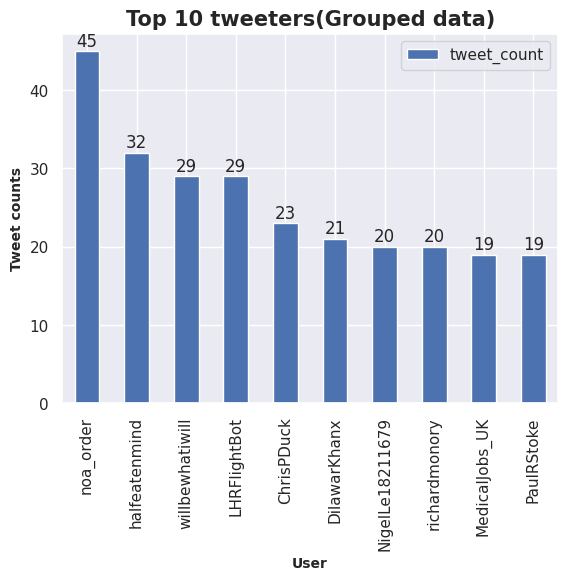

In [16]:

topusers = df_orig.groupby('username').size().sort_values(ascending=False).reset_index()
topusers = topusers.rename(columns = {0:'tweet_count'})
topusers = topusers[:10]

print(topusers)

#assigning variables
x = topusers['username']
y = topusers['tweet_count']

plt.figure(figsize=(7, 6))
ax = topusers.plot(kind='bar', rot=90, color="b")
ax.set_title("Top 10 tweeters(Grouped data)", fontdict = {'size':15, 'weight': 'bold'}, y = 1)
ax.set_xlabel('User',fontsize=10, fontweight='bold')
ax.set_ylabel('Tweet counts',fontsize=10, fontweight='bold')
ax.set_xticklabels(topusers['username'])

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()


In [17]:
#Getting all list of "stopwords" from Gensim library and displaying a few of these "stopwords"

customStopwords=list(gensim.parsing.preprocessing.STOPWORDS)
print(customStopwords[0:10])

['our', 'beforehand', 'had', 'amoungst', 'km', 're', 'co', 'part', 'either', 'regarding']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
#Tokenization and Visulalization on Tweets (Prior to Text pre-processing)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
#1- We will tokenize the "Raw" tweets(prior to text pre-processing) and visualize its contents (common words)
#to see how the original tweets look like

#1- Word tokenization on Raw tweets
#2- Visualizing frequent words with Bar graph and word clouds

In [23]:
#Tokenizing the tweet texts and finding mist common/frequent words appearing in the tweets

def wordtokenize(text):
    words = word_tokenize(text)
    return words

df['words'] =  df['text'].apply(wordtokenize)

tokenized_tweet = df['text'].apply(lambda x: list(ngrams(x.split(), 1)))
l = reduce(lambda x, y: list(x)+list(y), zip(tokenized_tweet))
flatten = [item for sublist in l for item in sublist]
counts = Counter(flatten).most_common()
df_new = pd.DataFrame.from_records(counts, columns=['Phrase', 'Count'])
df_new['Phrase']= df_new['Phrase'].apply(lambda x: ' '.join([w for w in x]))


flat_words = [item for sublist in df['words'] for item in sublist]

#Word Frequencies and most common words
word_freq = FreqDist(flat_words)
print(word_freq.most_common(20))

most_common_count = [x[1] for x in word_freq.most_common(30)]
most_common_word = [x[0] for x in word_freq.most_common(30)]

#create dictionary mapping of word count
top_30_dictionary = dict(zip(most_common_word, most_common_count))

[('@', 10670), ('.', 8040), ('the', 7386), ('#', 6572), (':', 6360), (',', 6356), ('to', 4999), ('https', 4775), ('a', 3851), ('in', 3646), ('and', 3601), ('of', 3563), ('I', 2663), ('’', 2405), ('is', 2334), ('!', 2256), ('for', 2204), ('you', 1778), ('on', 1745), ('it', 1648)]


In [24]:
#Wordcloud highlighting prominent words from the unprocessed tweets (prior to text pre-processing)

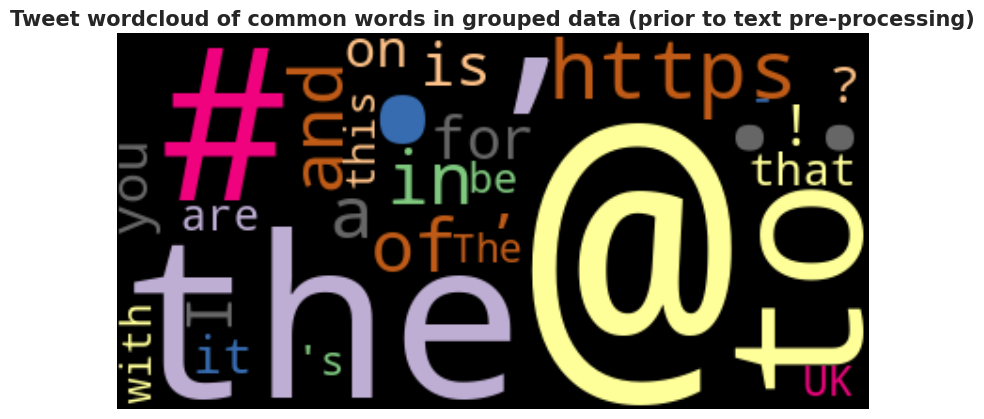

In [25]:

import warnings
warnings.filterwarnings("ignore")

wordcloud = WordCloud(stopwords=customStopwords,colormap = 'Accent', background_color = 'black')\
.generate_from_frequencies(top_30_dictionary)

#plot with matplotlib
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Tweet wordcloud of common words in grouped data (prior to text pre-processing)",fontsize = 15, fontweight='bold')
plt.tight_layout(pad=0)
# plt.savefig('top_30_cloud.png')

plt.show()

In [26]:
# Bar plot of most cmomon words in the raw tweets(prior to text pre-processing)

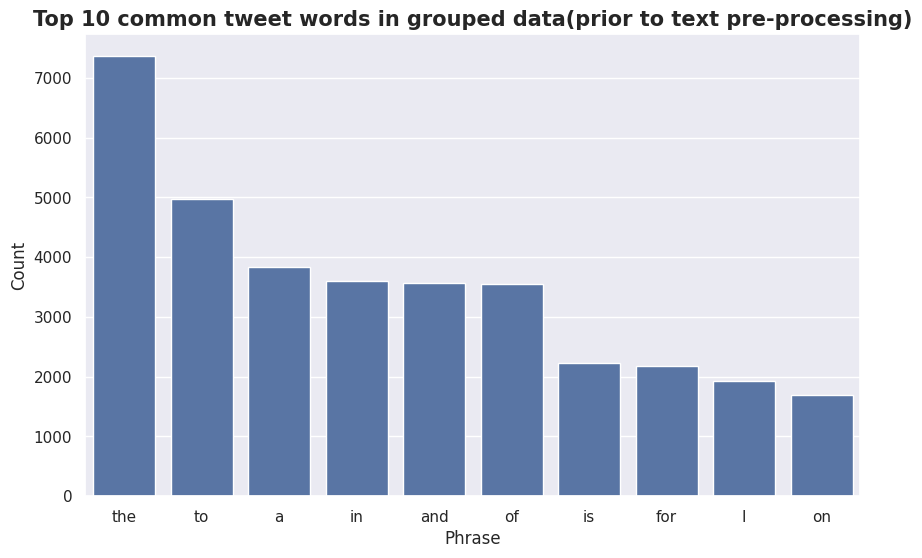

In [27]:
df_new = df_new.nlargest(columns="Count", n = 10)

plt.figure(figsize = (10,6))
ax = sns.barplot(data=df_new, x= "Phrase", y = "Count")
ax.set(ylabel = 'Count')
plt.title("Top 10 common tweet words in grouped data(prior to text pre-processing)", fontsize = 15, fontweight='bold')
plt.show()

In [28]:
#Observations-

#We can see from the plots(Bar/word cloud) that the Raw tweets contains unwanted characters appearing frequently as expected,
#which would not add any significance in the context of tweet topics later, and we have to get rid of them with the help of text-pre-processing.


In [34]:
#Step-2

#-Pre-processing Tweet texts

#1- Remove stop-words
#2- Remove punctuations
#3- Remove URL's
#4 -Remove hasgtags
#5 -Remove Audio-Video tags
#6 -Remove retweet characters
#7 -Tokenizing of the cleaned tweets
#8- Lemmatization instead of the stemming of the tweets to keep the root form of the tweets without altering meaning of the word

In [35]:
# Defining a string of punctuation symbols

punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# Functions to clean tweets
def remove_web_links(tweet):
    """Removing web links from strings"""
    tweet = re.sub(r'http\S+', '', tweet)   # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)  # remove bitly links
    tweet = tweet.strip('[link]')   # remove [links]
    tweet = re.sub(r'pic.twitter\S+','', tweet)
    return tweet

def remove_retweets(tweet):
    """Removing retweet and @user information from strings"""
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # Removing re-tweets
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # Removing tweeted at (@)
    return tweet

def remove_hashtags(tweet):
    """Removes any hash tags from strings"""
    tweet = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # Removing hash tags
    return tweet

def remove_audio_video_contents(tweet):
    """Removing any AUDIO/VIDEO tags or labels from strings"""
    tweet = re.sub('VIDEO:', '', tweet)  # Removing 'VIDEO' from start of tweet
    tweet = re.sub('AUDIO:', '', tweet)  # Removing 'AUDIO:' from start of tweet
    return tweet

def tokenize(tweet):
    """Returns tokenized representation of words in lemma form (excluding stopwords ) """
    result = []
    for token in gensim.utils.simple_preprocess(tweet):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:  # Dropping words with less than 3 characters
            result.append(lemmatize(token))
    return result

"""Lemmatization of a token"""
def lemmatize(token):
    return WordNetLemmatizer().lemmatize(token, pos='v')

"""Main function to clean tweets, stripping noisy characters, and tokenizing by using lemmatization"""

def preprocess_tweet(tweet):

    tweet = remove_retweets(tweet)
    tweet = remove_web_links(tweet)
    tweet = remove_hashtags(tweet)
    tweet = remove_audio_video_contents(tweet)
    tweet = tweet.lower()  # Converting to lower case
    tweet = re.sub('[' + punctuation + ']+', ' ', tweet)  # Removing punctuations
    tweet = re.sub('\s+', ' ', tweet)  # Removing double spacing
    tweet = re.sub('([0-9]+)', '', tweet)  # Removing numbers
    tweet = re.sub('📝 …', '', tweet)
    tweet_token_list = tokenize(tweet)  # Applying lemmatization and tokenization
    tweet = ' '.join(tweet_token_list)
    return tweet

"""Main function to read in and return cleaned and preprocessed dataframe.
This can be used in Jupyter notebooks by importing this module and calling the tokenize_tweets() function
"""
def tokenize_tweets(df):

    df['tokens'] = df.text.apply(preprocess_tweet)
    df = df[df['tokens'] != '']
    df = df.drop(['text'], axis=1)
    num_tweets = len(df)
    print('Number of Non-Grouped Tweets that has been cleaned and tokenized : {}'.format(num_tweets))
    return df

In [43]:
df

,group,words,tokens
0,0,"[criterion, certainly, right, restoration, unl...",criterion certainly right restoration unlikely...
1,1,"[say, weather, balloon, deviate, course, say, ...",say weather balloon deviate course say militar...
2,2,"[begin, understand, children, operational, sch...",begin understand children operational scheme p...
3,3,"[excess, deaths, skyrocket, england, wales, de...",excess deaths skyrocket england wales deaths e...
4,4,"[scotland, seychelles, syria, south, africa, s...",scotland seychelles syria south africa south k...
...,...,...,...
466,466,[cool],cool
467,467,"[mean, ford, ferrar]",mean ford ferrar
468,468,"[fuck, split, terminate, cunt, contract]",fuck split terminate cunt contract
469,469,"[graham, potter, start, havertz, aubameyang, l...",graham potter start havertz aubameyang ludacris


In [44]:
# Invoking the text pre-processing functions to clean and tokenize the tweet texts into words

# def wordtokenize(text):
#     words = word_tokenize(text)
#     return words

# df = tokenize_tweets(df)

# df['words'] =  df['tokens'].apply(wordtokenize)
# df.head(5)

In [46]:
#List of unique words sentence wise
df['words']

0      [criterion, certainly, right, restoration, unl...
1      [say, weather, balloon, deviate, course, say, ...
2      [begin, understand, children, operational, sch...
3      [excess, deaths, skyrocket, england, wales, de...
4      [scotland, seychelles, syria, south, africa, s...
                             ...                        
466                                               [cool]
467                                 [mean, ford, ferrar]
468             [fuck, split, terminate, cunt, contract]
469    [graham, potter, start, havertz, aubameyang, l...
470                      [arrangement, michael, jackson]
Name: words, Length: 469, dtype: object

In [47]:
# Creating a vocabulary of all unique words

In [48]:
all_words = [word for tokens in df['words'] for word in tokens]

tweet_length = df['tokens'].str.split().str.len()
vocab = sorted(list(set(all_words)))

print(vocab)

['aaaa', 'aaaaaa', 'aand', 'aaron', 'abakaliki', 'abandon', 'abbey', 'abbott', 'abby', 'abdal', 'abdication', 'abduct', 'abduction', 'abdullah', 'abeg', 'abel', 'aberdee', 'aberdeen', 'aberystwyth', 'abhor', 'abhorrent', 'abhorrently', 'abia', 'abigail', 'abilities', 'ability', 'abit', 'abiy', 'abject', 'able', 'ably', 'abnormal', 'aboard', 'abolish', 'abominations', 'abortion', 'abound', 'aboundant', 'abraham', 'abrams', 'abroad', 'abruptly', 'absence', 'absent', 'absloute', 'absolute', 'absolutely', 'abstentions', 'abstract', 'absurd', 'absurdly', 'absurdum', 'abuja', 'abundance', 'abuse', 'abuser', 'abusers', 'academia', 'academic', 'academically', 'academics', 'academy', 'accede', 'accelerate', 'acceleration', 'accent', 'accept', 'acceptable', 'acceptance', 'access', 'accessibility', 'accessible', 'accessorised', 'accident', 'accidental', 'accidentally', 'acclaim', 'accom', 'accommodate', 'accommodation', 'accompany', 'accord', 'accordingly', 'account', 'accountability', 'accountab

In [49]:
#Displaying tweet stats
print('{} tokens total, with a vocabulary(unique words) size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_length)))
print('Max tweet length is {}'.format(min(tweet_length)))
mean_tweet_len = np.round(np.mean(tweet_length))

print('Average tweet length is {}'.format(mean_tweet_len))

93761 tokens total, with a vocabulary(unique words) size of 15047
Max tweet length is 10184
Max tweet length is 1
Average tweet length is 200.0


In [50]:
#Finding the average word size
word_length = []
for word in all_words:
    word_length.append(len(word))
word_length

print('Average word size is {:0.2f}'.format( sum(word_length) / len(word_length)))

Average word size is 5.98


In [51]:
#Displaying last few tweet records from the cleaned dataframe after tokenization
df.tail(2)

,group,words,tokens
469,469,"[graham, potter, start, havertz, aubameyang, l...",graham potter start havertz aubameyang ludacris
470,470,"[arrangement, michael, jackson]",arrangement michael jackson


In [52]:
#Add the tweet length column into the dataframe
df['tweet_length'] = tweet_length
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 469 entries, 0 to 470
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   group         469 non-null    int64 
 1   words         469 non-null    object
 2   tokens        469 non-null    object
 3   tweet_length  469 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 18.3+ KB
None


In [53]:
# Sorting tweets by their lengths(in descending order) with long tweets appearing first
df = df.sort_values(by='tweet_length', ascending=True)
df.head()

,group,words,tokens,tweet_length
358,358,[mary],mary,1
429,429,[interest],interest,1
434,434,[hmmm],hmmm,1
441,441,[turn],turn,1
442,442,[wheelchair],wheelchair,1


In [54]:
#Get all Grouped tweet statistics on pre-processed data


unique_no_tweets = len(df.index)
print("Total no of unique tweets:", "%d" % (unique_no_tweets))

all_words = [word for tokens in df['tokens'] for word in tokens]
vocab = sorted(list(set(all_words)))

total_no_tokens = len(all_words)
vocab_size = len(vocab)
max_tweet_len = max(df['tweet_length'])
small_tweet_len = min(df['tweet_length'])

print('{} tokens total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is:  {}'.format(max_tweet_len))
print('Min tweet length is:  {}'.format(small_tweet_len))

#Average tweet length
# avg_length = df['tokens'].apply(lambda x: len(x)).mean()
avg_length = np.round(np.mean( df['tokens'].str.split().str.len()), 2)
print("Average tweet length is : ","%.0f" % avg_length)


# get shortest tweet row index
indx_small_tweet = df["tokens"].str.len().idxmin()
small_tweet =  df["tokens"][indx_small_tweet]

print('\n')
# get shortest tweet
print("Shortest tweet is: ", df["tokens"][indx_small_tweet])

# get longest tweet row index
indx_long_tweet = df["tokens"].str.len().idxmax()
long_tweet = df["tokens"][indx_long_tweet]

print('\n')
# get longest tweet value
print("Largest tweet is: ", df["tokens"][indx_long_tweet])


#Put all the above statistics into a dataframe

preprocessed_tweet_stats = pd.DataFrame(columns=(['No_of_unique tweets', 'Total_no_of_tokens', 'Vocabulary_size', 'Maximum_tweet_length', 'Minimum_tweet_length', 'Average_tweet_length', 'Longest_tweet', 'Smallest_tweet']),index=[0])

preprocessed_tweet_stats['No_of_unique tweets'] = unique_no_tweets
preprocessed_tweet_stats['Total_no_of_tokens'] = total_no_tokens
preprocessed_tweet_stats['Vocabulary_size'] = vocab_size
preprocessed_tweet_stats['Maximum_tweet_length'] = max_tweet_len
preprocessed_tweet_stats['Minimum_tweet_length'] = small_tweet_len
preprocessed_tweet_stats['Average_tweet_length'] = avg_length

preprocessed_tweet_stats['Longest_tweet'] = long_tweet
preprocessed_tweet_stats['Smallest_tweet'] = small_tweet

Total no of unique tweets: 469
654081 tokens total, with a vocabulary size of 291
Max tweet length is:  10184
Min tweet length is:  1
Average tweet length is :  200


Shortest tweet is:  mary


Largest tweet is:  george santos news secret tap catch congressman admit lie give botox advice congressman admit obviously record conversation prospective staffer get fact road actual plot consist yuukis secret american twin york steal purse attn york overseas voters senators committee write senator floor vote enable overseas voters return ballot electronically dont hate dont shower dont pay hour york york hell town erie canal build private business opposition build york state pay cost year greater port canal open great lakes prosperity york harrington claude franklin best live york city laundry build know suspect chinese balloon arkansas york alaska nevada california north dakota mississippi texas georgia louisiana hawaii call york central station general information inquire 王者荣耀 永劫无间 颜色陪玩 天使陪玩

In [55]:
#Display the dataframe with the tweet stats data (post pre-processing of tweet text)
preprocessed_tweet_stats

,No_of_unique tweets,Total_no_of_tokens,Vocabulary_size,Maximum_tweet_length,Minimum_tweet_length,Average_tweet_length,Longest_tweet,Smallest_tweet
0,469,654081,291,10184,1,199.78,george santos news secret tap catch congressma...,mary


In [56]:
#Visualizing distribution of tweet lengths

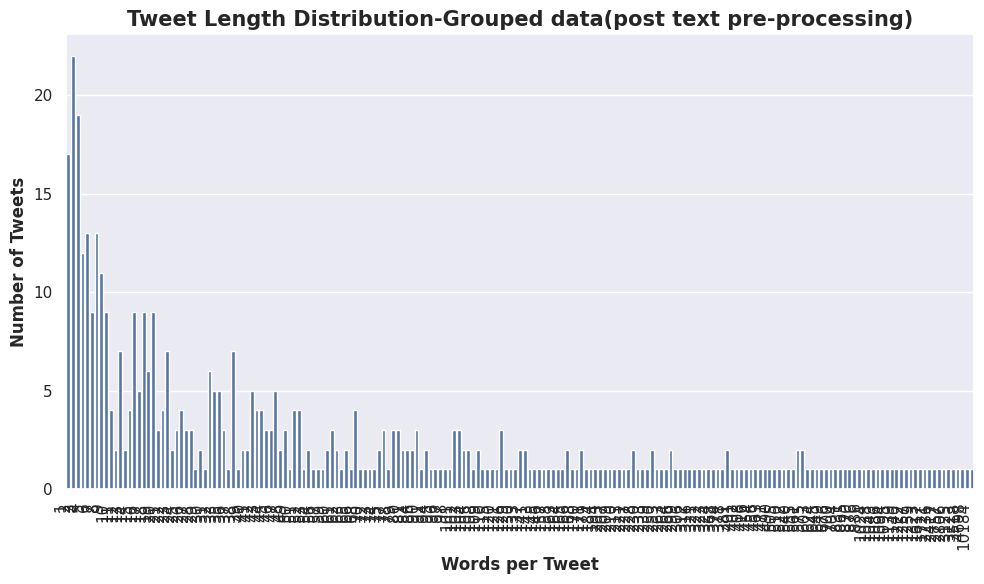

In [57]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x=df['tweet_length'])
plt.title('Tweet Length Distribution-Grouped data(post text pre-processing)', fontsize = 15, fontweight='bold')
plt.xlabel('Words per Tweet', fontsize = 12, fontweight='bold')
plt.ylabel('Number of Tweets', fontsize = 12, fontweight='bold')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  #it will rotate text on x axis

plt.tight_layout()

plt.show()



In [58]:
#Describing Statistical measures of the tweet lengths

df['tweet_length'].describe()

count      469.000000
mean       199.778252
std        657.502655
min          1.000000
25%          9.000000
50%         36.000000
75%        108.000000
max      10184.000000
Name: tweet_length, dtype: float64

In [59]:
# from string import ascii_lowercase, digits
# from random import choice, randrange

# len = df['tweet_length']
# chars = ascii_lowercase + digits
# lst = [''.join(choice(chars) for _ in range(randrange(0, 101, 1))) for _ in range(10000)]

# tweet_lengths = list(map(len, lst))
# sns.countplot(tweet_lengths)
# plt.title('Tweet lengths')
# plt.xlabel('Tweet lengths')
# plt.ylabel('# of tweets')

Text(0, 0.5, 'Probability Density')

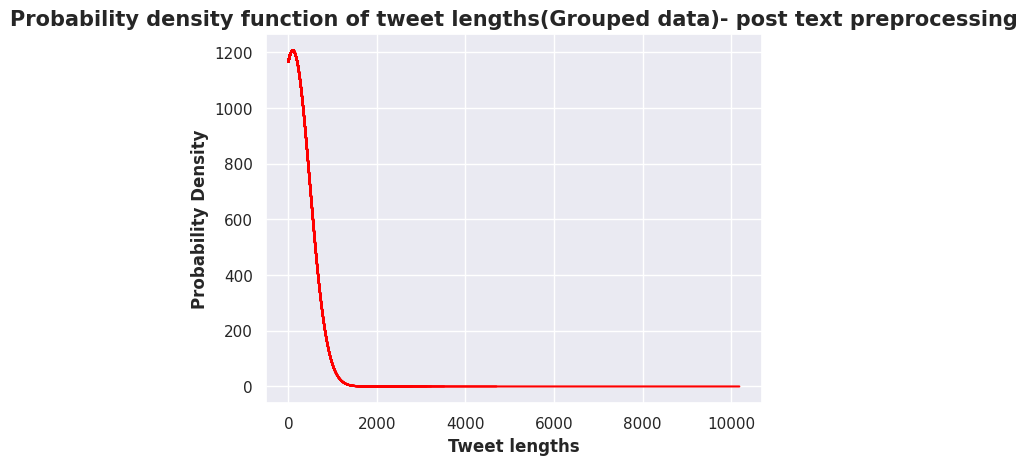

In [60]:
# Calculating and plotting probability density from distribution of tweet lengths

# Creating a series of data ponts between for tweel length range.
x = np.linspace(1,df['tweet_length'],200)

#Normal distribution Function.
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

#Calculating mean and Standard deviation.
mean = np.mean(x)
sd = np.std(x)

#Applying normal distribution function to the data.
pdf = normal_dist(x,mean,sd)

#Plotting the results
plt.plot(x,pdf , color = 'red')
plt.title('Probability density function of tweet lengths(Grouped data)- post text preprocessing',fontsize = 15, fontweight='bold')
plt.xlabel('Tweet lengths',fontweight='bold')
plt.ylabel('Probability Density',fontweight='bold')

<Figure size 1000x600 with 0 Axes>

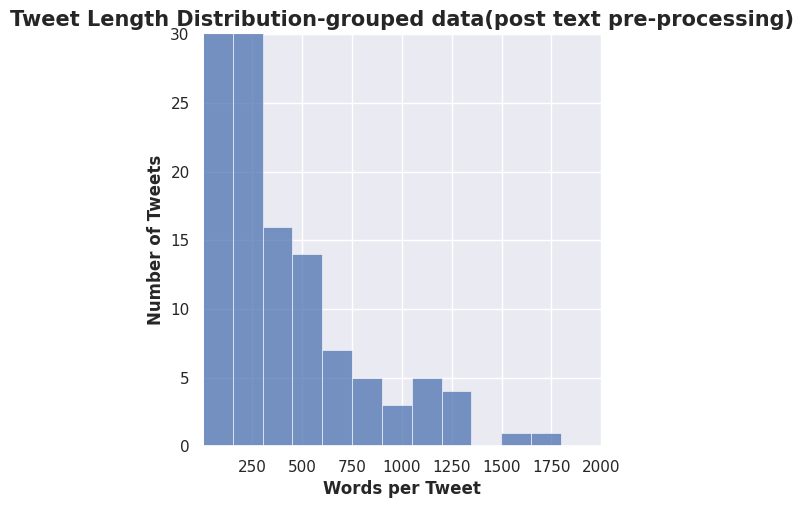

In [61]:
plt.figure(figsize = (10,6))
# ax = sns.countplot(x=df['tweet_length'])

sns.displot(df, x='tweet_length', binwidth=150)
plt.xlim([1, 2000])
plt.ylim([0,30])
plt.title('Tweet Length Distribution-grouped data(post text pre-processing)', fontsize = 15, fontweight='bold')
plt.xlabel('Words per Tweet', fontsize = 12, fontweight='bold')
plt.ylabel('Number of Tweets', fontsize = 12, fontweight='bold')

# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  #it will rotate text on x axis

# plt.tight_layout()

plt.show()

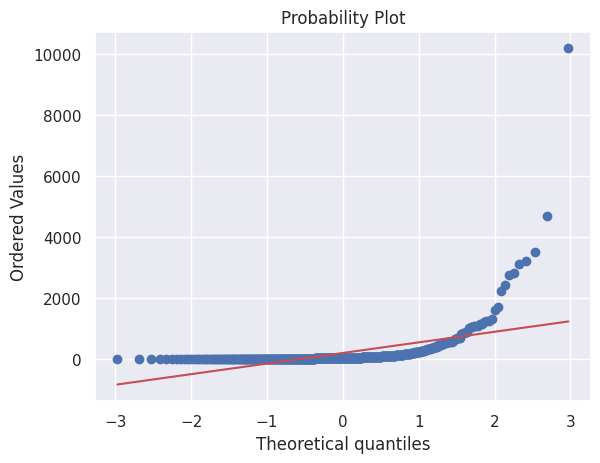

In [62]:
#Q-Q(Quantile-Quantile) plot from tweet length distribution to determine if the tweet lengths follow a normal distribution pattern

import scipy.stats as stats
import statsmodels.api as sm
import pylab
# sm.qqplot(df['tweet_length'],line='45')
# # sm.qqplot(df['avg_glucose_level'])
# pylab.show()

stats.probplot(df['tweet_length'], dist="norm", plot=pylab)
pylab.show()

In [63]:
#Observation=
#1- We can observe that most of the tweets are short tweets (with words between 3-11 per tweet) with maximum tweet length is at 32.


In [64]:
#Word Frequencies and most common words (top 30 common words)

flat_words = [item for sublist in df['words'] for item in sublist]
word_freq = FreqDist(flat_words)
word_freq.most_common(30)

[('york', 787),
 ('london', 696),
 ('like', 550),
 ('time', 509),
 ('people', 497),
 ('labour', 473),
 ('think', 412),
 ('england', 406),
 ('go', 391),
 ('know', 377),
 ('work', 356),
 ('need', 348),
 ('live', 346),
 ('look', 339),
 ('come', 324),
 ('want', 324),
 ('conservatives', 311),
 ('good', 305),
 ('say', 302),
 ('boris', 273),
 ('right', 271),
 ('city', 253),
 ('vote', 247),
 ('race', 236),
 ('love', 235),
 ('scotland', 235),
 ('party', 234),
 ('link', 225),
 ('play', 222),
 ('years', 221)]

In [65]:
#retrieve word and count from FreqDist tuples

most_common_count = [x[1] for x in word_freq.most_common(30)]
most_common_word = [x[0] for x in word_freq.most_common(30)]

#create dictionary mapping of word count
top_30_dictionary = dict(zip(most_common_word, most_common_count))
print('Diplay top 30 common words of grouped data')
most_common_word

Diplay top 30 common words of grouped data


['york',
 'london',
 'like',
 'time',
 'people',
 'labour',
 'think',
 'england',
 'go',
 'know',
 'work',
 'need',
 'live',
 'look',
 'come',
 'want',
 'conservatives',
 'good',
 'say',
 'boris',
 'right',
 'city',
 'vote',
 'race',
 'love',
 'scotland',
 'party',
 'link',
 'play',
 'years']

In [66]:
#Visualizing most common words( top 30 words)

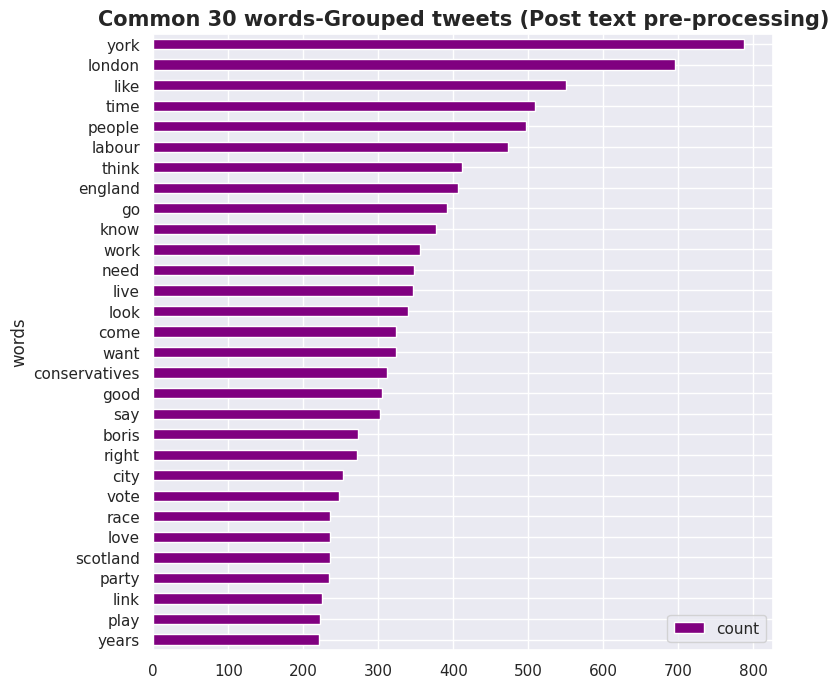

In [67]:
#Plot most common 30 words
clean_tweets_nsw = pd.DataFrame(word_freq.most_common(30),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common 30 words-Grouped tweets (Post text pre-processing)",  fontdict = {'size':15, 'weight': 'bold'}, y = 1)

plt.show()

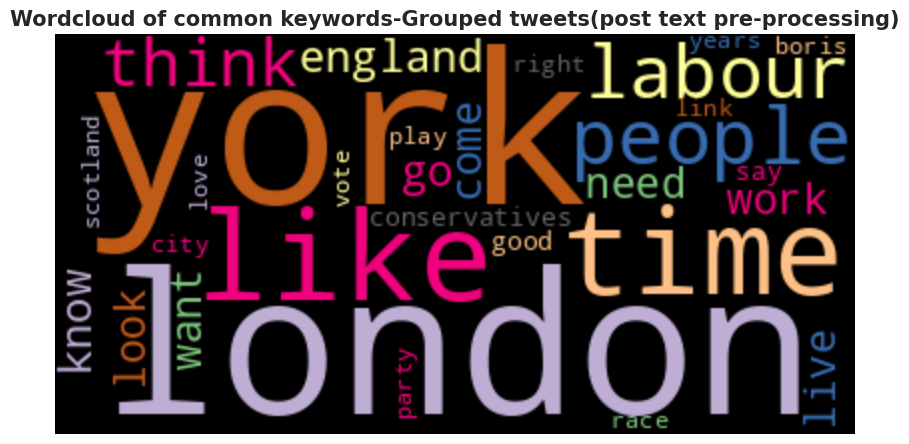

In [68]:
#Create Word Cloud of top 30 words
import warnings
warnings.filterwarnings("ignore")


wordcloud = WordCloud(colormap = 'Accent', background_color = 'black')\
.generate_from_frequencies(top_30_dictionary)

#plot with matplotlib
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Wordcloud of common keywords-Grouped tweets(post text pre-processing)", fontsize = 15, fontweight='bold')
plt.savefig('top_30_cloud.png')


plt.show()

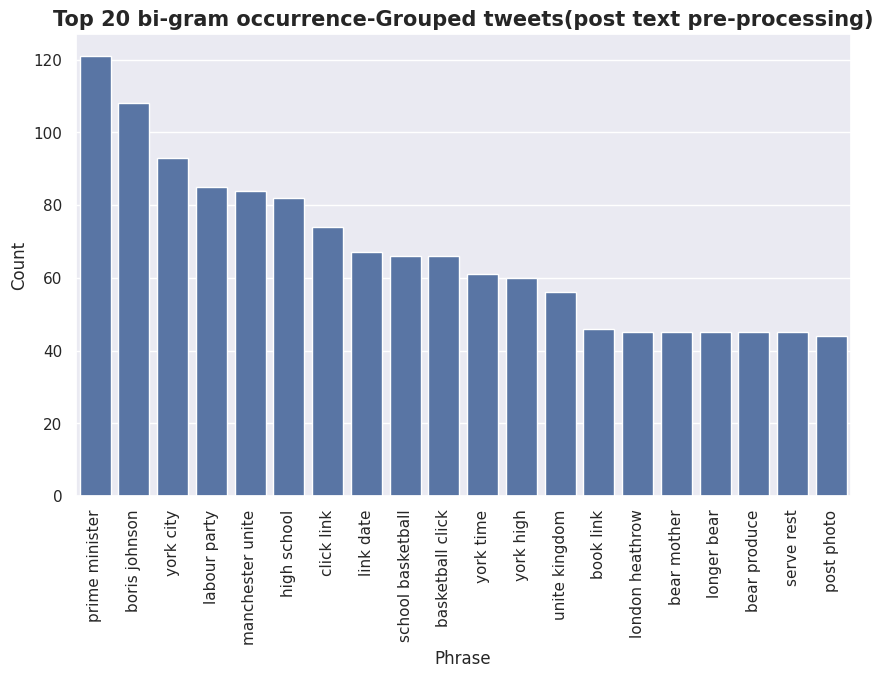

In [69]:
#Top bigrams appearing in the tweet

tokenized_tweet = df['tokens'].apply(lambda x: list(ngrams(x.split(), 2)))
l = reduce(lambda x, y: list(x)+list(y), zip(tokenized_tweet))
flatten = [item for sublist in l for item in sublist]
counts = Counter(flatten).most_common()
df_new = pd.DataFrame.from_records(counts, columns=['Phrase', 'Count'])
df_new['Phrase']= df_new['Phrase'].apply(lambda x: ' '.join([w for w in x]))

df_new = df_new.nlargest(columns="Count", n = 20)
plt.figure(figsize = (10,6))
ax = sns.barplot(data=df_new, x= "Phrase", y = "Count")
plt.title('Top 20 bi-gram occurrence-Grouped tweets(post text pre-processing)', fontsize = 15, fontweight='bold')
ax.set(ylabel = 'Count')
plt.xticks(rotation=90)
plt.show()

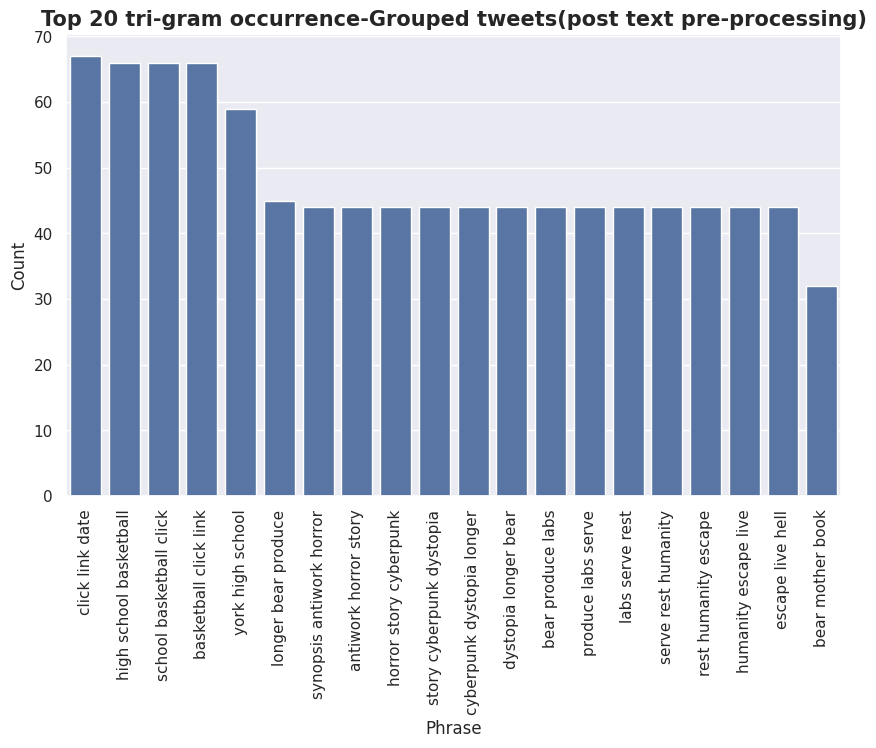

In [70]:
#Top trigrams appearing in the tweet

tokenized_tweet = df['tokens'].apply(lambda x: list(ngrams(x.split(), 3)))
l = reduce(lambda x, y: list(x)+list(y), zip(tokenized_tweet))
flatten = [item for sublist in l for item in sublist]
counts = Counter(flatten).most_common()
df_new = pd.DataFrame.from_records(counts, columns=['Phrase', 'Count'])
df_new['Phrase']= df_new['Phrase'].apply(lambda x: ' '.join([w for w in x]))

df_new = df_new.nlargest(columns="Count", n = 20)
plt.figure(figsize = (10,6))
ax = sns.barplot(data=df_new, x= "Phrase", y = "Count")
plt.title('Top 20 tri-gram occurrence-Grouped tweets(post text pre-processing)', fontsize = 15, fontweight='bold')
ax.set(ylabel = 'Count')
plt.xticks(rotation=90)
plt.show()

In [71]:
# LDA Model

#1-
# Creating a Bag-of-words(BoW) collection 'Unigrams' tokens which are appearing in not less than (5%) of documents,
# and not appearing in more than (95%) of the documents.

#Idea here is to filter out probably noise appearing across all documents and also removing most frequent generic words,
# which will not add any significance to the topics to be formed.


#2-
#Choosing a random number of topics(k) to initialize the LDA model, assuming they will possibly cover all the document corpus.
#The model will then work on a heuristic based approach (probabilistic generative approach) with a set of diagnostic measures
#to aid in selecting the right no of topics.

In [72]:

#Step-1-
#Latent Dirichlet Allocation (LDA)

#This step is required to create a Bag-of-words(BoW) from tweet texts and map the documents to these words
#so that it can be used as an argument to LDA model

text_dict = Dictionary(df.words)
# print(text_dict)

# Keeping tokens which are contained in at least no_below (5) documents, and in no more than  no_above(90%) of documents

text_dict.filter_extremes(no_below = 5, no_above = .90)
txt_out = text_dict.token2id

tweets_bow = [text_dict.doc2bow(tweet) for tweet in df['words']]
print(tweets_bow[3])


[(2, 1)]


In [73]:
#Step-2 LDA

#Arguments of LDA Model:
#1- Initialize the no. of topics (k=) of LDA model (k = 12), which is based on bag-of-words model.
#i.e. assume all documents(tweet sentences) in the corpus are distributed within 12 topics.
#Reason for initoalizing no. of topics is we want to start with an initial random model to zero-on on the final model
#based on metrics diagnostics in a heuristic manner

#2-Bag-of-words
#3-Doc-word mapping vector
#4-No. of passes the model should go through to converge on the topics

#Our idea is to see how the topic clusters separate out from each other based on their group similarity:

k = 8

tweets_lda = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 42,
                      passes=1)

In [74]:

#This is a  list of (word, probability) 2-tuples for the most probable words in topic topic-id.
# Here it shows top 10 words which are highly likely (with high probability) to appear in the respective 5 documents.
# Only return 2-tuples for the top 10(by default) most probable words (ignore the rest).

#This shows the probabilty contribution of all 10 words in respective topics
tweets_lda.show_topics()

[(0,
  '0.016*"york" + 0.015*"time" + 0.010*"boris" + 0.009*"need" + 0.008*"people" + 0.008*"london" + 0.007*"like" + 0.006*"work" + 0.005*"think" + 0.005*"go"'),
 (1,
  '0.015*"london" + 0.015*"people" + 0.010*"play" + 0.009*"conservatives" + 0.007*"like" + 0.007*"time" + 0.007*"think" + 0.006*"look" + 0.006*"labour" + 0.006*"come"'),
 (2,
  '0.022*"london" + 0.010*"ticket" + 0.009*"time" + 0.007*"go" + 0.006*"think" + 0.006*"need" + 0.006*"manchester" + 0.006*"want" + 0.005*"work" + 0.005*"unite"'),
 (3,
  '0.026*"york" + 0.008*"england" + 0.006*"time" + 0.005*"say" + 0.005*"come" + 0.005*"go" + 0.005*"high" + 0.005*"wales" + 0.005*"city" + 0.005*"labour"'),
 (4,
  '0.019*"like" + 0.010*"people" + 0.009*"know" + 0.009*"conservatives" + 0.009*"good" + 0.006*"love" + 0.006*"look" + 0.006*"think" + 0.005*"england" + 0.005*"want"'),
 (5,
  '0.013*"flight" + 0.013*"labour" + 0.011*"york" + 0.010*"london" + 0.009*"link" + 0.008*"airport" + 0.007*"heathrow" + 0.006*"think" + 0.005*"want" + 

In [75]:
# Function for finding the dominant topics and topic keywords and their contribution (in %)

# def dominant_topics_keywords_sentences(ldamodel=None, corpus=tweets_bow, texts=df['tokens']):

#     # Initialize output
#     sent_topics_df = pd.DataFrame()

#     # Get main topic in each document
#     for i, row_list in enumerate(ldamodel[tweets_bow]):
#         row = row_list[0] if ldamodel.per_word_topics else row_list
#         # print(row)
#         row = sorted(row, key=lambda x: (x[1]), reverse=True)
#         # Get the Dominant topic, Perc Contribution and Keywords for each document
#         for j, (topic_num, prop_topic) in enumerate(row):
#             if j == 0:  # => dominant topic
#                 wp = ldamodel.show_topic(topic_num)
#                 topic_keywords = ", ".join([word for word, prop in wp])
#                 sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
#             else:
#                 break
#     sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

#     # Add original text to the end of the output
#     contents = pd.Series(texts)
#     sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
#     return(sent_topics_df)


In [77]:
def dominant_topics_keywords_sentences(ldamodel=None, corpus=tweets_bow, texts=None):
    # Initialize output list
    data = []

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution, and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                data.append({'Dominant_Topic': int(topic_num), 'Perc_Contribution': round(prop_topic, 4), 'Topic_Keywords': topic_keywords})
                break

    # Create DataFrame
    sent_topics_df = pd.DataFrame(data)

    # Add original text to the end of the output
    contents = pd.Series(texts, name="Texts")
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return sent_topics_df


In [79]:
#Dominant topics and keywords and their percentage of contribution
df_topic_sents_keywords = dominant_topics_keywords_sentences(ldamodel=tweets_lda, corpus=tweets_bow, texts=df['words'])

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.5617,"flight, labour, york, london, link, airport, h...","[criterion, certainly, right, restoration, unl..."
1,1,2.0,0.5621,"london, ticket, time, go, think, need, manches...","[say, weather, balloon, deviate, course, say, ..."
2,2,0.0,0.1250,"york, time, boris, need, people, london, like,...","[begin, understand, children, operational, sch..."
3,3,2.0,0.5617,"london, ticket, time, go, think, need, manches...","[excess, deaths, skyrocket, england, wales, de..."
4,4,0.0,0.1250,"york, time, boris, need, people, london, like,...","[scotland, seychelles, syria, south, africa, s..."
5,5,0.0,0.1250,"york, time, boris, need, people, london, like,...","[horse, race, history, today, race, february, ..."
6,6,0.0,0.1250,"york, time, boris, need, people, london, like,...","[ridiculous, service, store, remember, order, ..."
7,7,0.0,0.1250,"york, time, boris, need, people, london, like,...","[check, snake, eye, check, item, etsy, shop, w..."
8,8,0.0,0.1250,"york, time, boris, need, people, london, like,...","[jouvenel, sovereignty, fable, babylon, city, ..."
9,9,0.0,0.1250,"york, time, boris, need, people, london, like,...","[break, impunity, shame, hunt, unionists, care..."


In [80]:
#Visualizing top 10 words in each topic

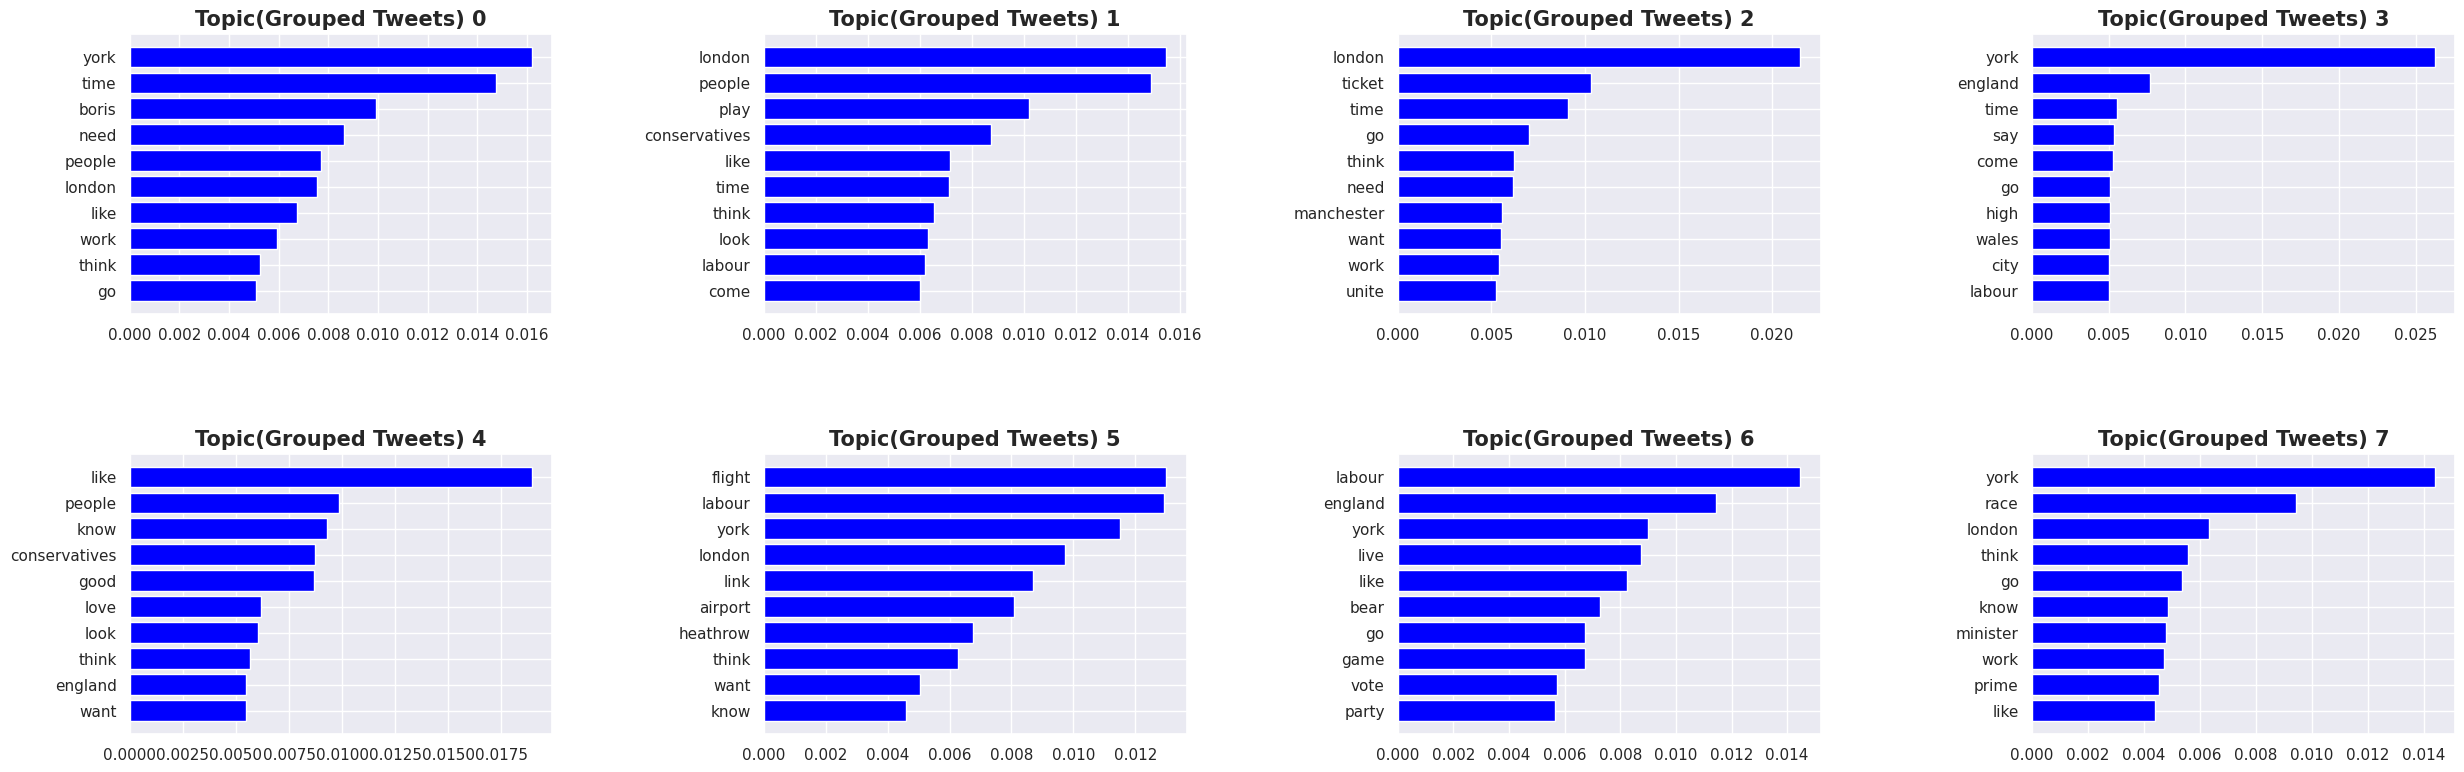

In [81]:
def plot_topicwise_top_words(lda=tweets_lda, nb_topics=k, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=.5, hspace=.5)
    plt.figure(figsize=(30,20))
    plt.title("Topicwise top words distribution", fontsize = 15, fontweight='bold')
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic(Grouped Tweets) "+str(i),fontsize = 15, fontweight='bold')

plot_topicwise_top_words()

In [82]:
#Observations and Inferences

#1 - From an initial eyeballing of the 8 topics, We can see that topics-4, 5, and 6 are overlapping to some extent,
#and has most common words appearing in them all in the context of politics

#2- But topics 1 to 3 seems quite distinct with possibly no overlapping between them in terms of commonly appearing words,
#which we can confirm below with the help of Topic Bubble.

In [83]:
#Infering the LDA Model visually:

#Topic Bubble:

#The representation includes topics distribution in the 2-dimensional space (left side panel).These topics are represented in the form of bubbles.
#The larger the bubble, the more frequent is the topic in the documents.
#A topic model with a low number of topics will have big non-overlapping bubbles, scattered throughout the chart whereas, the topic model with a high number of topics, will have many overlapping small size bubbles, clustered in the chart.
#Distance between the topics is an approximation of semantic relationship between the topics.
#The topic which shares common words will be overlapping (closer in distance) in comparison to the non-overlapping topic.

In [84]:
#Displaying the "Topic Bubble"

import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(tweets_lda, tweets_bow, dictionary=tweets_lda.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.003382  0.014625       1        1  19.110441
2     -0.028966 -0.005184       2        1  17.431405
0      0.001481 -0.000223       3        1  17.173968
3      0.007786 -0.017142       4        1  16.868967
6      0.013065  0.030494       5        1  12.459602
1     -0.015820  0.002728       6        1   8.921201
7      0.000396 -0.012835       7        1   5.218675
5      0.025441 -0.012463       8        1   2.815742, topic_info=         Term        Freq       Total Category  logprob  loglift
184      york  759.000000  759.000000  Default  30.0000  30.0000
112    labour  412.000000  412.000000  Default  29.0000  29.0000
64     london  668.000000  668.000000  Default  28.0000  28.0000
1783   flight   47.000000   47.000000  Default  27.0000  27.0000
271      link  191.000000  191.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
1645     need    7.552004  340.991442   Topic8  -5.5783  -0.2401
1008    right    7.140062  268.195372   Topic8  -5.6344  -0.0561
762   england    7.096627  405.519014   Topic8  -5.6405  -0.4756
648      time    7.053415  500.552453   Topic8  -5.6466  -0.6923
33        say    6.716334  301.117709   Topic8  -5.6955  -0.2330

[556 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1010      1  0.149316   able
1010      2  0.124430   able
1010      3  0.248859   able
1010      4  0.099544   able
1010      5  0.099544   able
...     ...       ...    ...
2260      3  0.157764  youth
2260      4  0.039441  youth
2260      5  0.354968  youth
2260      6  0.039441  youth
2260      7  0.039441  youth

[2487 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 1, 4, 7, 2, 8, 6])

In [85]:
#Observations and Inferences from the Topic Bubble visualization

#1- From the Topic Bubble visualization, it appears topics 1, 2 and 4 are overlapping to a great extent, while topics 3,5 and 6 are quite distinct.
#2 - Larger bubbles (i.e. topics-1 and 2) signifying these topics are most frequent in the tweet document corpus, and here
# they are all in the context of politics, implying people are more cobversing in the domain of politics.

#3 - Distance between topics 1, 2 and 4 is very negligible i.e. overlapping topics meaning they are almost semantically similar here.

In [86]:
#Determining optimal "topic numbers" i.e. Process to zeroing-on the right no of topics the documents should converge on.

#First we would conside below 2 evaluation metrics to help us in determining the ideal number of topics.

# I am using both measures below in combination to determine the optimal number of topics.
#a- Jaccard similarity
#b - Model coherence

# Idea behind here is to see if it satisfies these below 2-criterias (Ideal criteria) -
#1- Maximum coherence of individual topics and
#2- Minimum overlap between topics in the documents
#( i.e. mean stability across topics) based on Jaccard similarity


#Explanation - 1 -  Why topic coherence?
# It measures a single topic's cohesiveness i.e. the degree of similarity between high scoring words in the topic to find wheather these words co-occur across the text corpus.

#Explanation - 2 - Why mean stability across topics) based on Jaccard similarity?

#Objective here is to detect low Jaccard scores across all pairs of topics indicating coverage of the diverse words across all topics/documents.
# Understanding is that if the topics are not overlapping among themseleves, and are apart from each other, then there is an element of stability among them
# which further reaffirms our above coherence findings.

#Our initial assumption is all the text corpus are clustered into 12 topics, and then refine from then onwards.

#1st step- Create LDA models across different topic numbers (from 1-15)
#2nd step- Then calculate the Jaccard similarity and coherence for each model.
#3rd step -


# Ideal number of topics roughly through the difference between the coherence and stability per number of topics


In [87]:
#Start by creating dictionaries for models and topic words for the various topic numbers you want to consider,
#where in this case (corpus) is the cleaned tokens, num_topics is a list of topics you want to consider,
#and num_words is the number of top words per topic that you want to be considered for the metrics:

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import LdaModel, CoherenceModel
from gensim import corpora

In [89]:
#Sentence wise unique words
corpus = df['words']
corpus

358                                               [mary]
429                                           [interest]
434                                               [hmmm]
441                                               [turn]
442                                         [wheelchair]
                             ...                        
22     [paedo, torture, starve, children, partner, de...
26     [shock, leave, wing, bias, effort, hide, anymo...
3      [excess, deaths, skyrocket, england, wales, de...
14     [sound, like, consider, appoint, autism, adhd,...
15     [george, santos, news, secret, tap, catch, con...
Name: words, Length: 469, dtype: object

In [90]:
#LDAModel function for finding topics based on Bag-of-words corpus

corpus = df['words']

dirichlet_dict = corpora.Dictionary(corpus)
bow_corpus = [dirichlet_dict.doc2bow(text) for text in corpus]

# Considering 1-12 topics, as the last is cut off
num_topics = list(range(k+1)[1:])

#This keyword(num_keywords) argument is just to show certain keywords in the topics instead of displaying all keywords
num_keywords = 10

LDA_models = {}
LDA_topics = {}

for i in num_topics:
    LDA_models[i] = LdaModel(corpus=bow_corpus,
                             id2word=dirichlet_dict,
                             num_topics=i,
                             update_every=1,
                             chunksize=len(bow_corpus),
                             passes=1,
                             alpha='auto',
                             random_state=42)

    shown_topics = LDA_models[i].show_topics(num_topics=i,
                                             num_words=num_keywords,
                                             formatted=False)
    LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]

In [91]:
#Display the LDA topics
print(LDA_topics)

#Display the Bag-of-words corpus
print(bow_corpus)

{1: [['york', 'london', 'like', 'time', 'people', 'labour', 'think', 'england', 'go', 'know']], 2: [['york', 'time', 'people', 'go', 'think', 'know', 'need', 'labour', 'london', 'work'], ['london', 'like', 'york', 'labour', 'time', 'people', 'england', 'good', 'come', 'think']], 3: [['time', 'go', 'york', 'conservatives', 'people', 'need', 'think', 'work', 'know', 'look'], ['london', 'labour', 'like', 'good', 'time', 'come', 'boris', 'people', 'live', 'think'], ['york', 'london', 'like', 'people', 'england', 'labour', 'think', 'know', 'time', 'want']], 4: [['york', 'time', 'go', 'conservatives', 'scotland', 'need', 'know', 'work', 'think', 'london'], ['london', 'like', 'good', 'boris', 'come', 'live', 'time', 'think', 'love', 'conservatives'], ['york', 'like', 'london', 'know', 'england', 'want', 'think', 'people', 'tories', 'say'], ['labour', 'york', 'people', 'london', 'time', 'go', 'england', 'think', 'right', 'need']], 5: [['go', 'conservatives', 'scotland', 'york', 'know', 'need',

In [92]:
#Finding Jaccard similarity between a pair of topics

#Finding topic stability in terms of overlapping between them
#Metrics used- Jaccard similarity index:
#1- Less the Jaccard similarity index score between 2 topics, the more distinct the pair of topics are

# Significance - It means more a pair of topics overlap among themseleves and are similar,
#the less stable they are in terms of being distinct topics

In [93]:
"""
Jaccard similarity index derivation between two topics
- A statistic used for comparing the similarity and diversity of sample sets
- J(A,B) = (A ∩ B)/(A ∪ B)
- Goal is low Jaccard scores for coverage of the diverse elements
"""

def jaccard_similarity(topic_1, topic_2):

    intersection = set(topic_1).intersection(set(topic_2))
    union = set(topic_1).union(set(topic_2))

    return float(len(intersection))/float(len(union))

In [94]:
#Compute the mean stability across topics by taking into account the next topics
#Note- Here there would be 4 stability scores between 5 initilaized topics (each pair of topics has one stability score)

In [95]:
LDA_stability = {}

for i in range(0, len(num_topics)-1):
    jaccard_similarities = []
    for t1, topic1 in enumerate(LDA_topics[num_topics[i]]):
        sims = []

        for t2, topic2 in enumerate(LDA_topics[num_topics[i+1]]):
            sims.append(jaccard_similarity(topic1, topic2))

        jaccard_similarities.append(sims)

    LDA_stability[num_topics[i]] = jaccard_similarities

mean_stabilities = [np.array(LDA_stability[i]).mean() for i in num_topics[:-1]]

In [96]:
# Mean topic stability scores between pairs of topics
for (num,item) in enumerate(mean_stabilities):
    print("Mean stability score(Jaccard similarity) for Grouped tweets between a pair of topics %s and %s is %.2f " % (num,num+1,item ))


Mean stability score(Jaccard similarity) for Grouped tweets between a pair of topics 0 and 1 is 0.67 
Mean stability score(Jaccard similarity) for Grouped tweets between a pair of topics 1 and 2 is 0.52 
Mean stability score(Jaccard similarity) for Grouped tweets between a pair of topics 2 and 3 is 0.39 
Mean stability score(Jaccard similarity) for Grouped tweets between a pair of topics 3 and 4 is 0.34 
Mean stability score(Jaccard similarity) for Grouped tweets between a pair of topics 4 and 5 is 0.32 
Mean stability score(Jaccard similarity) for Grouped tweets between a pair of topics 5 and 6 is 0.31 
Mean stability score(Jaccard similarity) for Grouped tweets between a pair of topics 6 and 7 is 0.28 


In [97]:
# Ideal number of topics  (Approx. difference between the coherence and stability per number of topics)

In [98]:
#Finding coherences of different LDA models with different number of topics
#i.e. LDA model with 1 topic, 2 topics and so on till topic 8

#This is to determine the optimal no. of topics as and when a model becomes optimally cohesive and reaches a saturation state.
#It means How each individual topics are contextually meaningful, but are quite distinct from other topics
#The more the coherence score, the better the model is.

In [99]:
#Finding coherences for LDA models different number of topics

#This coherencce is for all LDA models (starting with 1 till 11 topics), just done to plot with mean stability score(as that's between topic pairs)
coherences = [CoherenceModel(model=LDA_models[i], texts=corpus, dictionary=dirichlet_dict, coherence='c_v').get_coherence()\
              for i in num_topics[:-1]]

#This coherence score is for all LDA models (starting with 1 till 12 topics)
coherences_1 = [CoherenceModel(model=LDA_models[i], texts=corpus, dictionary=dirichlet_dict, coherence='c_v').get_coherence()\
              for i in num_topics]

print(coherences_1)


[0.3317880055739514, 0.33857257218682346, 0.316039723935456, 0.2977788042476163, 0.2928282892091995, 0.2894001344326291, 0.2854989450354246, 0.2896619449081925]


In [100]:
for (num,item) in enumerate(coherences_1):
    print("CV(Content Vector) Coherence score for LDA model(Grouped tweets) with %s topics is %.2f " % (num+1,item ))

CV(Content Vector) Coherence score for LDA model(Grouped tweets) with 1 topics is 0.33 
CV(Content Vector) Coherence score for LDA model(Grouped tweets) with 2 topics is 0.34 
CV(Content Vector) Coherence score for LDA model(Grouped tweets) with 3 topics is 0.32 
CV(Content Vector) Coherence score for LDA model(Grouped tweets) with 4 topics is 0.30 
CV(Content Vector) Coherence score for LDA model(Grouped tweets) with 5 topics is 0.29 
CV(Content Vector) Coherence score for LDA model(Grouped tweets) with 6 topics is 0.29 
CV(Content Vector) Coherence score for LDA model(Grouped tweets) with 7 topics is 0.29 
CV(Content Vector) Coherence score for LDA model(Grouped tweets) with 8 topics is 0.29 


In [101]:
#UMass coherence score
#This coherencce is for all LDA models (starting with 1 till 8 topics)
#It calculates how often two words, and appear together in the corpus.

#UMass score indicates how many times words and appear together in documents, and is how many time word appeared alone


coherences_umass = [CoherenceModel(model=LDA_models[i], texts=corpus, dictionary=dirichlet_dict, coherence='u_mass').get_coherence()\
              for i in num_topics[:-1]]

#This coherence score is for all LDA models (starting with 1 till 12 topics)
coherences_1_umass = [CoherenceModel(model=LDA_models[i], texts=corpus, dictionary=dirichlet_dict, coherence='u_mass').get_coherence()\
              for i in num_topics]

for (num,item) in enumerate(coherences_1_umass):
    print("UMass Coherence score for LDA model(Grouped tweets) with %s topics is %.2f " % (num+1,item ))

UMass Coherence score for LDA model(Grouped tweets) with 1 topics is -0.77 
UMass Coherence score for LDA model(Grouped tweets) with 2 topics is -0.75 
UMass Coherence score for LDA model(Grouped tweets) with 3 topics is -0.72 
UMass Coherence score for LDA model(Grouped tweets) with 4 topics is -0.83 
UMass Coherence score for LDA model(Grouped tweets) with 5 topics is -0.77 
UMass Coherence score for LDA model(Grouped tweets) with 6 topics is -0.75 
UMass Coherence score for LDA model(Grouped tweets) with 7 topics is -0.71 
UMass Coherence score for LDA model(Grouped tweets) with 8 topics is -0.75 


In [102]:

# Ideal number of topics  is : (Approx. difference between the coherence and stability per number of topics)

In [103]:

#Deriving the ideal number of topics roughly through the difference between the coherence and stability per number of topics:

coh_sta_diffs = [coherences[i] - mean_stabilities[i] for i in range(k-1)] # limit topic numbers to the number of keywords
coh_sta_max = max(coh_sta_diffs)
coh_sta_max_idxs = [i for i, j in enumerate(coh_sta_diffs) if j == coh_sta_max]
ideal_topic_num_index = coh_sta_max_idxs[0] # choose less topics in case there's more than one max
ideal_topic_num = num_topics[ideal_topic_num_index]

print(ideal_topic_num)
print(ideal_topic_num_index)
print(num_topics)

7
6
[1, 2, 3, 4, 5, 6, 7, 8]


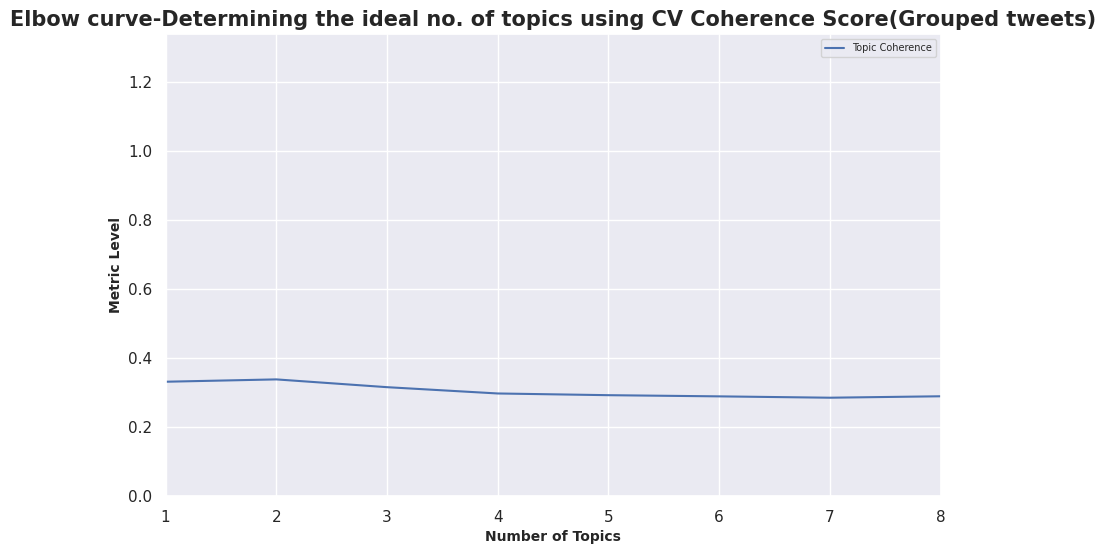

CV (Content vector) Coherence score for LDA model(Grouped tweets) with 1 topics is 0.33 
CV (Content vector) Coherence score for LDA model(Grouped tweets) with 2 topics is 0.34 
CV (Content vector) Coherence score for LDA model(Grouped tweets) with 3 topics is 0.32 
CV (Content vector) Coherence score for LDA model(Grouped tweets) with 4 topics is 0.30 
CV (Content vector) Coherence score for LDA model(Grouped tweets) with 5 topics is 0.29 
CV (Content vector) Coherence score for LDA model(Grouped tweets) with 6 topics is 0.29 
CV (Content vector) Coherence score for LDA model(Grouped tweets) with 7 topics is 0.29 
CV (Content vector) Coherence score for LDA model(Grouped tweets) with 8 topics is 0.29 


In [104]:
#Line plot between no of topics and CV Coherence score

plt.figure(figsize=(10,6))
ax = sns.lineplot(x=num_topics, y=coherences_1, label='Topic Coherence')

y_max = max(coherences_1) + 1

ax.set_ylim([0, y_max])
ax.set_xlim([1, num_topics[-1]])

# ax.axes.set_title('Elbow curve for finding the ideal no. of topics based only on Coherence Score(Single Pass data)', fontsize = 15)

ax.axes.set_title('Elbow curve-Determining the ideal no. of topics using CV Coherence Score(Grouped tweets)', fontsize = 15, fontweight='bold')

ax.set_ylabel('Metric Level', fontsize=10, fontweight='bold')
ax.set_xlabel('Number of Topics', fontsize=10, fontweight='bold')
plt.legend(fontsize=7)
plt.show()

for (num,item) in enumerate(coherences_1):
    print("CV (Content vector) Coherence score for LDA model(Grouped tweets) with %s topics is %.2f " % (num+1,item ))



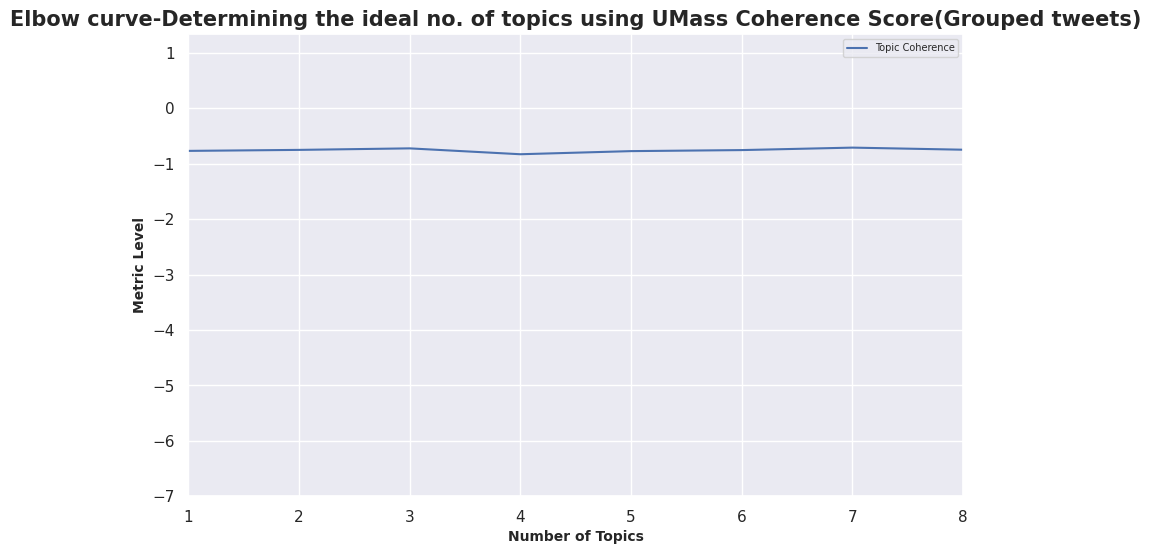

UMass Coherence score for LDA model(Grouped tweets) with 1 topics is -0.77 
UMass Coherence score for LDA model(Grouped tweets) with 2 topics is -0.75 
UMass Coherence score for LDA model(Grouped tweets) with 3 topics is -0.72 
UMass Coherence score for LDA model(Grouped tweets) with 4 topics is -0.83 
UMass Coherence score for LDA model(Grouped tweets) with 5 topics is -0.77 
UMass Coherence score for LDA model(Grouped tweets) with 6 topics is -0.75 
UMass Coherence score for LDA model(Grouped tweets) with 7 topics is -0.71 
UMass Coherence score for LDA model(Grouped tweets) with 8 topics is -0.75 


In [105]:
#Line plot between no of topics and UMass Coherence score

plt.figure(figsize=(10,6))
ax = sns.lineplot(x=num_topics, y=coherences_1_umass, label='Topic Coherence')

y_max = max(coherences_1) + 1

ax.set_ylim([-7, y_max])
ax.set_xlim([1, num_topics[-1]])

ax.axes.set_title('Elbow curve-Determining the ideal no. of topics using UMass Coherence Score(Grouped tweets)', fontsize = 15, fontweight='bold')

ax.set_ylabel('Metric Level', fontsize=10, fontweight='bold')
ax.set_xlabel('Number of Topics', fontsize=10, fontweight='bold')
plt.legend(fontsize=7)
plt.show()

for (num,item) in enumerate(coherences_1_umass):
    print("UMass Coherence score for LDA model(Grouped tweets) with %s topics is %.2f " % (num+1,item ))

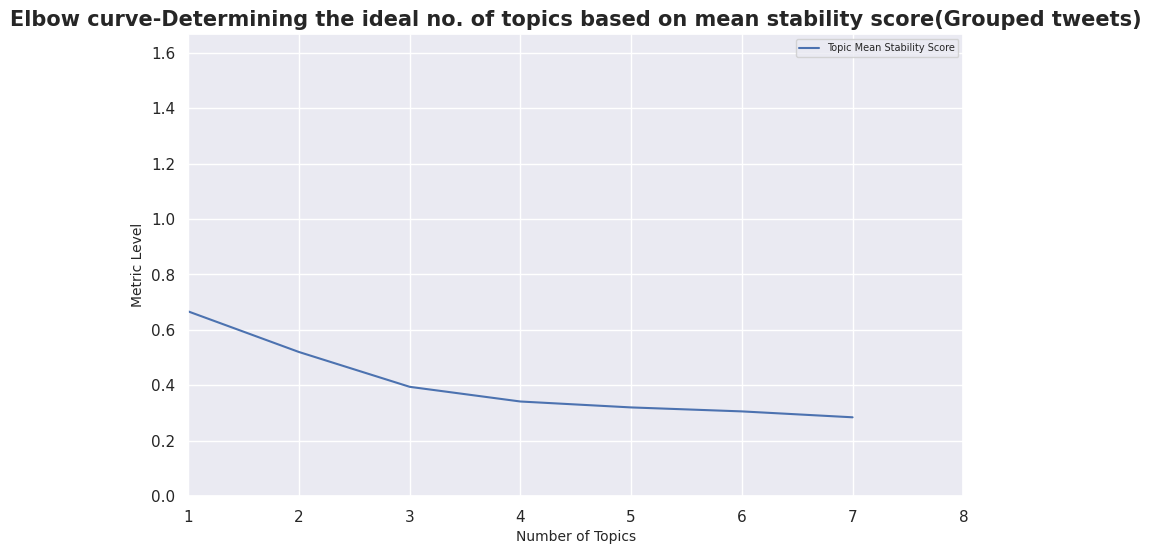

Mean stability score(Jaccard similarity) for Grouped tweets between pair of topics 0 and 1 is 0.67 
Mean stability score(Jaccard similarity) for Grouped tweets between pair of topics 1 and 2 is 0.52 
Mean stability score(Jaccard similarity) for Grouped tweets between pair of topics 2 and 3 is 0.39 
Mean stability score(Jaccard similarity) for Grouped tweets between pair of topics 3 and 4 is 0.34 
Mean stability score(Jaccard similarity) for Grouped tweets between pair of topics 4 and 5 is 0.32 
Mean stability score(Jaccard similarity) for Grouped tweets between pair of topics 5 and 6 is 0.31 
Mean stability score(Jaccard similarity) for Grouped tweets between pair of topics 6 and 7 is 0.28 


In [106]:

#Line plot between no of topics and Topic mean stability score (Jaccard Similarity Score)
#Stability score is between a pair of topics, so total scores is "no. of topics -1"

ntopics = list(range(1, k))


plt.figure(figsize=(10,6))
ax = sns.lineplot(x=ntopics, y=mean_stabilities, label='Topic Mean Stability Score')

y_max = max(mean_stabilities) + 1

ax.set_ylim([0, y_max])
ax.set_xlim([1, num_topics[-1]])

ax.axes.set_title('Elbow curve-Determining the ideal no. of topics based on mean stability score(Grouped tweets)', fontsize = 15, fontweight='bold')
ax.set_ylabel('Metric Level', fontsize=10)
ax.set_xlabel('Number of Topics', fontsize=10)
plt.legend(fontsize=7)
plt.show()

for (num,item) in enumerate(mean_stabilities):
    print("Mean stability score(Jaccard similarity) for Grouped tweets between pair of topics %s and %s is %.2f " % (num,num+1,item ))

In [107]:
#Observations-

#Note-Usually, the coherence score will increase with the increase in the number of topics.
#This increase will become smaller as the number of topics gets higher.
#he trade-off between the number of topics and coherence score can be achieved using the so-called elbow technique.
#The method implies plotting coherence score as a function of the number of topics.
#We will use the elbow of the curve to select the number of topics.

#The idea behind this method is that we want to choose a point after which the diminishing increase of coherence score is no longer worth
#the additional increase of the number of topics.

#Inference- In our case -
# The coherence score does not fluctuate much and stays in and around (=0.3) from topic=1 till topic=5
#So Coherence score alone is not deterministic in finding out the ideal no. of topics

#Next course of action to find out the ideal no. of topics:-
# In next step- we will also consider overlap between topics (i.e. topic stability score (Jacqaurd's overlap score))
#in addition to Coherence score to find out where(at what topic number) there is a maximum separation distance between the two curves.

#Idea behind taking two measures(i.e. Stability score and UMass Coherence score) is that Coherence score may not fluctuate much and
#Note- Ideal number of topics will maximize coherence and minimize the topic overlap based on Jaccard similarity.

#Note-
#High topic stability score indicating high overlap between topics(i.e topics are less distinguishable), and less stability score
#( i.e. topics are distinguishable)



In [108]:
# A general rule of thumb is to create LDA models across different topic numbers, and then check the Jaccard similarity and coherence for each.
# Coherence in this case measures a single topic by the degree of semantic similarity between high scoring words in the topic
# (do these words co-occur across the text corpus). The following will give a strong intuition for the optimal number of topics.
# This should be a baseline before jumping to the hierarchical Dirichlet process, as that technique has been found to have issues in practical applications.

# Start by creating dictionaries for models and topic words for the various topic numbers you want to consider,
# where in this case corpus is the cleaned tokens, num_topics is a list of topics you want to consider,
#and num_words is the number of top words per topic that you want to be considered for the metrics:

In [109]:
#Visualization to see how the Stability scores (Jaccard's similarity score) and Topic Coherence Scores varies between topics
#in order to find out the right no of topics.

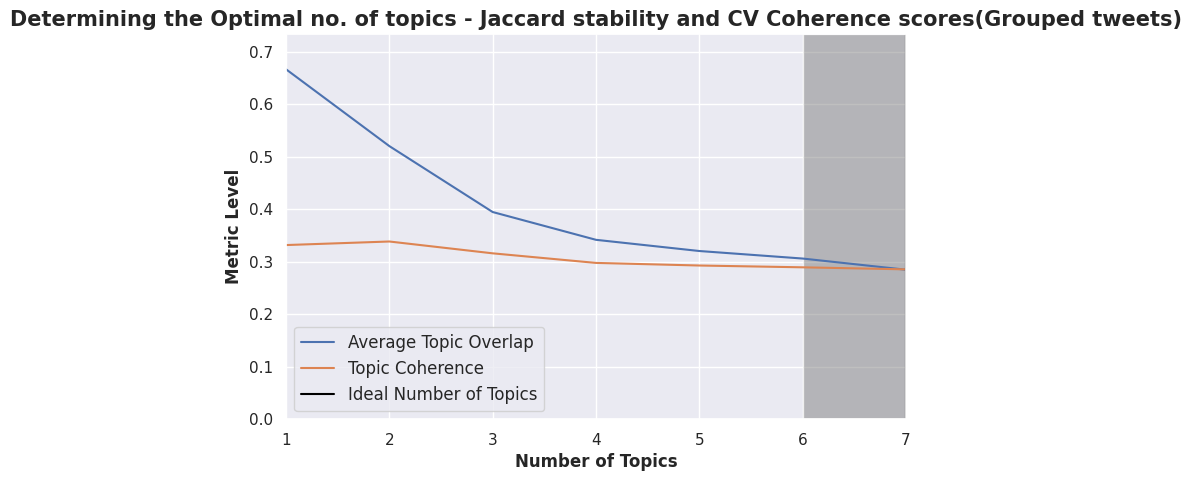

In [110]:
plt.figure(figsize=(8,5))
ax = sns.lineplot(x=num_topics[:-1], y=mean_stabilities, label='Average Topic Overlap')
ax = sns.lineplot(x=num_topics[:-1], y=coherences, label='Topic Coherence')

ax.axvline(x=ideal_topic_num, label='Ideal Number of Topics', color='black')
ax.axvspan(xmin=ideal_topic_num - 1, xmax=ideal_topic_num + 1, alpha=0.5, facecolor='grey')

y_max = max(max(mean_stabilities), max(coherences)) + (0.10 * max(max(mean_stabilities), max(coherences)))
ax.set_ylim([0, y_max])
ax.set_xlim([1, num_topics[-1]-1])

ax.axes.set_title('Determining the Optimal no. of topics - Jaccard stability and CV Coherence scores(Grouped tweets)', fontsize = 15, fontweight='bold')
ax.set_ylabel('Metric Level', fontsize=12, fontweight='bold')
ax.set_xlabel('Number of Topics', fontsize=12, fontweight='bold')
plt.legend(fontsize=12)
plt.show()

In [111]:
#Inference from the Plot(to determine the ideal number of topics)
#1- We cam see that though the stability score decreases gradually , but topics are highly unstable(i.e. high overlap between them) from start no of topics till topics 3,
#even though coherence score does not change much, but from topic 3 onwards, there is not much varation in topic stability( indicating possibly topics are highly separable)
#indicating diminishing return of low statbility score(after topic=3), which is not worth considering.



In [112]:
#Next we will consider the below measure(around the idea of probability distribution models) to understand how well our choosen topic model(with no of topics) may work against unseen test data

# Perplexity Score

In [113]:
#Perplexity Score explanation:

# Perplexity is a measurement of how well a probability distribution or probability model predicts a sample.
# It may be used to compare probability models.
# A low perplexity indicates the LDA trained model probability distribution is good at predicting the test sample,
# and model is less surprised in clustering unseen test data

In [114]:
#Finding perplexity scores for LDA models created from different topics (i.e. k=1, k=2, k=3 and so on)
#Note-
#Perplexity is the Minimum of log-likelihood value

perplexity = []
for i in (num_topics):

# Computing Perplexity Score
    perplexity.append(LDA_models[i].log_perplexity(bow_corpus))

# A measure of how good the model is. lower the perplexity the better it is.
print('\nPerplexity Score: ', perplexity)

# for (num,item) in enumerate(perplexity):
#     print("Coherence score for LDA model with %s topics is %.2f " % (num+1,item ))



Perplexity Score:  [-8.484143289913147, -8.55493256935317, -8.627537483768116, -8.718041623273361, -8.789691773142756, -8.876577705668705, -8.963653681540778, -9.048589771454928]


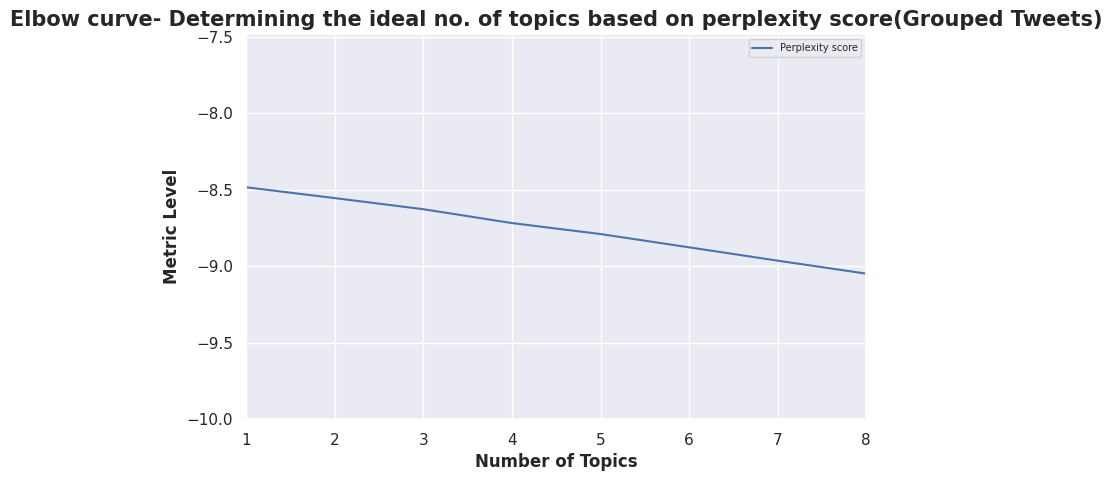

Perplexity score for LDA model with 1 topics is -8.48 
Perplexity score for LDA model with 2 topics is -8.55 
Perplexity score for LDA model with 3 topics is -8.63 
Perplexity score for LDA model with 4 topics is -8.72 
Perplexity score for LDA model with 5 topics is -8.79 
Perplexity score for LDA model with 6 topics is -8.88 
Perplexity score for LDA model with 7 topics is -8.96 
Perplexity score for LDA model with 8 topics is -9.05 


In [115]:
#Line plot between no of topics and Perplexity score

plt.figure(figsize=(8,5))
ax = sns.lineplot(x=num_topics, y=perplexity, label='Perplexity score')

y_max = max(perplexity) + 1

ax.set_ylim([-10, y_max])
ax.set_xlim([1, num_topics[-1]])

ax.axes.set_title('Elbow curve- Determining the ideal no. of topics based on perplexity score(Grouped Tweets)', fontsize = 15, fontweight='bold')
ax.set_ylabel('Metric Level', fontsize=12, fontweight='bold')
ax.set_xlabel('Number of Topics', fontsize=12, fontweight='bold')
plt.legend(fontsize=7)
plt.show()

for (num,item) in enumerate(perplexity):
    print("Perplexity score for LDA model with %s topics is %.2f " % (num+1,item ))

In [116]:
#Inference:

#Here the the graph does not indicate the fluctuation clearly as the variation in values is less and not significant as the topic numbers increase,
#but on absolute terms we can see that from topic-1 to topic-5, the perplexity score decreases consistently
#But the decrease in perplexity score stablizes from topic 3 onwards and is is uniform (with score difference of =0.4 ),
#indicating point of diminishing return in selecting more no of topics beyond topic 3.


In [117]:
# Next we will conside KL Divergence score

#This significance of KL score

#KL Divergence helps us to measure just how much information we lose when we choose an approximation.
#KL-Divergence gives the divergence of one distribution from another.
#it is basically the information a distribution loses while approximating to another distribution indicating Lesser the KL score, more the similarity between two distributions.

#So lesser the divergence between two probability distributions (between the original distribution and the distribution to be approximated,
#the better the model is in terms of generating topics using this current model (with the optimal no of topics).

#So our objective is to see if the KL divergence score betweeen created models(from different topics) decreases as the topic increases.


In [118]:
#KL-Divergence Metrics computation

In [119]:
# Generates corpus length vectors.
corpus_length_vector = np.array(
    [sum(frequency for _, frequency in document) for document in tweets_bow]
)

print("Number of topics: ", num_topics)
print("\n")
print("corpus_length_vector: ", corpus_length_vector)
print("\n")

print("All tweets bag of words: ", tweets_bow)

Number of topics:  [1, 2, 3, 4, 5, 6, 7, 8]


corpus_length_vector:  [   1    1    0    1    0    0    0    0    0    0    0    1    1    1
    1    0    0    1    2    1    1    1    1    1    2    0    1    1
    1    2    1    2    1    2    0    0    1    0    1    1    3    1
    1    3    0    1    1    1    3    1    2    0    2    2    2    2
    3    1    3    3    2    4    2    0    1    3    0    0    1    1
    5    0    2    5    3    5    4    4    4    3    5    3    3    4
    4    4    3    4    2    5    2    5    3    4    4    2    5    2
    3    1    7    5    4    4    3    0    3    2    6    5    7    6
    6    2    7    6    6    5    5    0    1    7    4    6    6    4
    9    7    8   11    5    6   10    7    9    6   10    7    6   11
    9   13   13   12   11   10   12   11    0    6   15    8   10   10
    9   10    9   13   10   14    2   10   12   11    9   11   14   15
   18   13   14    6   14   13   16   14    9   13   12   15   16   15
   14   

In [120]:
# Kullback-Leibler divergence metrics computation function

#, stats.entropy(q, p)
def kl_divergence_calc(p, q):
    return np.sum([stats.entropy(p, q)])

In [121]:
#Imp Note- This step takes almost 5 mins to execute.

#Finding the KL Divergence score along with dominant topic vector across the document corpus
kl_divergence = []

for i in num_topics:
     # Calculates raw LDA matrix
        lda=LDA_models[i]
        matrix = lda.expElogbeta

        # Caluculates SVD for LDA matris.
        U, document_word_vector, V = np.linalg.svd(matrix)

        # Gets LDA topics.
        lda_topics = lda[tweets_bow]

        # Caluculates document-topic matrix.
        term_document_matrix = matutils.corpus2dense(
            lda_topics, lda.num_topics).transpose()

        document_topic_vector = corpus_length_vector.dot(term_document_matrix)

        document_topic_vector = document_topic_vector + 0.0001
        document_topic_norm   = np.linalg.norm(corpus_length_vector)

        document_topic_vector = document_topic_vector / document_topic_norm

        kl_divergence.append(kl_divergence_calc(
            document_word_vector,
            document_topic_vector
        ))

In [122]:
#Displaying the LDA topics
lda_topics

In [123]:
#KL-Divergence values for different topic models based on no of topics(k) (k=1 to 6)
for (num,item) in enumerate(kl_divergence):
    print("KL Divergence score for LDA model(Grouped tweets) with %s topics is %.2f " % (num+1,item ))

KL Divergence score for LDA model(Grouped tweets) with 1 topics is 0.00 
KL Divergence score for LDA model(Grouped tweets) with 2 topics is 0.09 
KL Divergence score for LDA model(Grouped tweets) with 3 topics is 0.31 
KL Divergence score for LDA model(Grouped tweets) with 4 topics is 0.46 
KL Divergence score for LDA model(Grouped tweets) with 5 topics is 0.44 
KL Divergence score for LDA model(Grouped tweets) with 6 topics is 0.58 
KL Divergence score for LDA model(Grouped tweets) with 7 topics is 0.68 
KL Divergence score for LDA model(Grouped tweets) with 8 topics is 0.45 


KL Divergence score for LDA model(Grouped tweets) with 1 topics is 0.00 
KL Divergence score for LDA model(Grouped tweets) with 2 topics is 0.09 
KL Divergence score for LDA model(Grouped tweets) with 3 topics is 0.31 
KL Divergence score for LDA model(Grouped tweets) with 4 topics is 0.46 
KL Divergence score for LDA model(Grouped tweets) with 5 topics is 0.44 
KL Divergence score for LDA model(Grouped tweets) with 6 topics is 0.58 
KL Divergence score for LDA model(Grouped tweets) with 7 topics is 0.68 
KL Divergence score for LDA model(Grouped tweets) with 8 topics is 0.45 


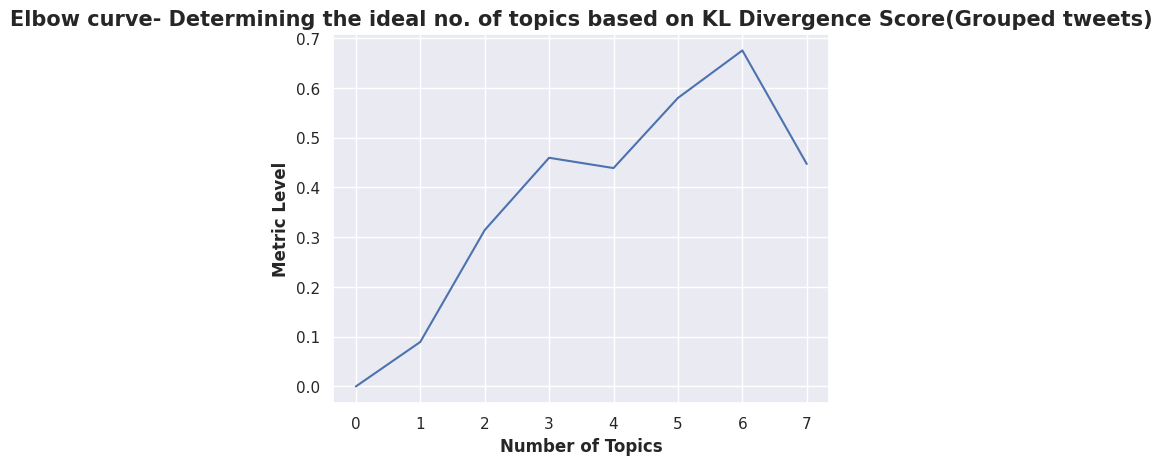

In [124]:
#Plot kL- divergence values for the initial 12 topics
import matplotlib.pyplot as plotter

# Plots KL divergence against initial number of topics i.e. 5.
plotter.plot(kl_divergence)
plotter.ylabel('Metric Level', fontweight='bold')
plotter.xlabel('Number of Topics', fontweight='bold')

plotter.title('Elbow curve- Determining the ideal no. of topics based on KL Divergence Score(Grouped tweets)', fontsize=15,fontweight='bold')

for (num,item) in enumerate(kl_divergence):
    print("KL Divergence score for LDA model(Grouped tweets) with %s topics is %.2f " % (num+1,item ))

In [125]:
#Observations from the KL Asymetric Divergence Plot

# 1-Topic KL Divergence score peaks with 2-topics(=0.16), and abruptly declines and incerases again with 3 and 4 topics respectively.
# 2-KL score continues its downward trend again with 4-topic onwards and the score seems to slow down after 7-topics with diminishing score returns after that.

In [126]:
#Print topic coherence values

In [127]:
#Put all the LDA model diagnostic metrics in a  single dataframe to visualize it later to see the model behaviour

df_metrics = pd.DataFrame()

# append columns to an empty DataFrame
df_metrics['Topic'] = range(1,k)
df_metrics['UMass_Coherence_Score'] = coherences
df_metrics['Cluster_Mean_Stability_Jaccqard_Similarity_Score'] = mean_stabilities
df_metrics['Perplexity_Score'] = perplexity[:-1]
df_metrics['KL_Divergence_Score'] = kl_divergence[:-1]

df_metrics

,Topic,UMass_Coherence_Score,Cluster_Mean_Stability_Jaccqard_Similarity_Score,Perplexity_Score,KL_Divergence_Score
0,1,0.331788,0.666667,-8.484143,0.000000
1,2,0.338573,0.520299,-8.554933,0.089468
2,3,0.316040,0.394720,-8.627537,0.314269
3,4,0.297779,0.341773,-8.718042,0.459668
4,5,0.292828,0.320446,-8.789692,0.438967
5,6,0.289400,0.306105,-8.876578,0.579911
6,7,0.285499,0.284801,-8.963654,0.675393


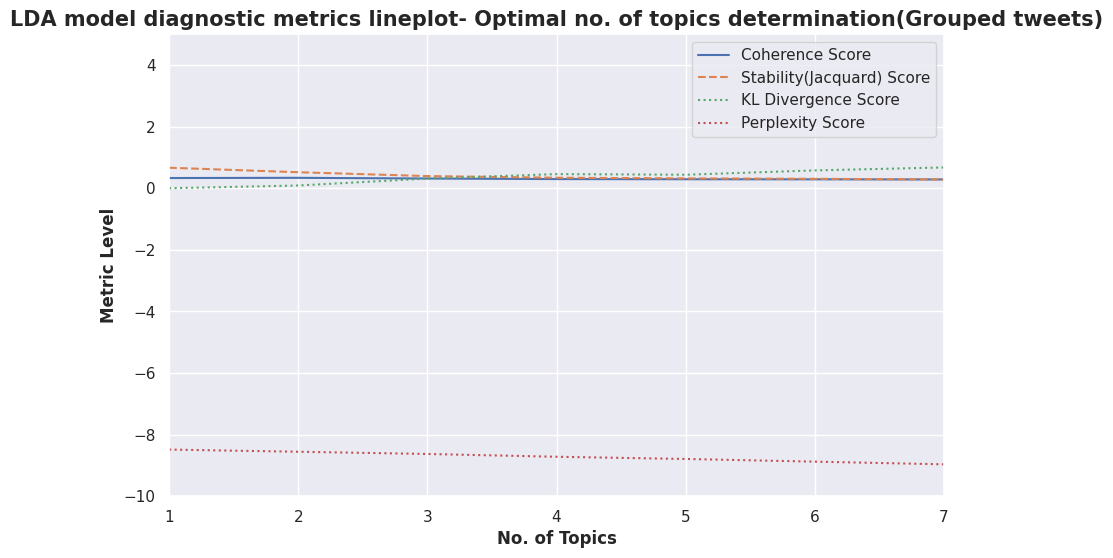

In [128]:
#Plot a line graph for all the LDA metrics for all topics to understand how they change

plt.figure(figsize=(10, 6))

# Plot lines for Coherence Score and Mean_Stability_Jaccqard_Similarity_Score

plt.plot(df_metrics['Topic'], df_metrics['UMass_Coherence_Score'], label = "Coherence Score", linestyle="-")
plt.plot(df_metrics['Topic'], df_metrics['Cluster_Mean_Stability_Jaccqard_Similarity_Score'], label = "Stability(Jacquard) Score", linestyle="--")

# plt.plot(df_metrics['Topic'], df_metrics['Perplexity_Score'], label = "Perplexity Score", linestyle="-.")
plt.plot(df_metrics['Topic'], df_metrics['KL_Divergence_Score'], label = "KL Divergence Score", linestyle=":")

plt.plot(df_metrics['Topic'], df_metrics['Perplexity_Score'], label = "Perplexity Score", linestyle=":")

plt.xlim([1, 7])
plt.ylim([-10,5])

plt.xlabel("No. of Topics", fontweight='bold')
plt.ylabel("Metric Level",fontweight='bold')
plt.title('LDA model diagnostic metrics lineplot- Optimal no. of topics determination(Grouped tweets)', fontsize=15, fontweight='bold')

plt.legend()
plt.show()



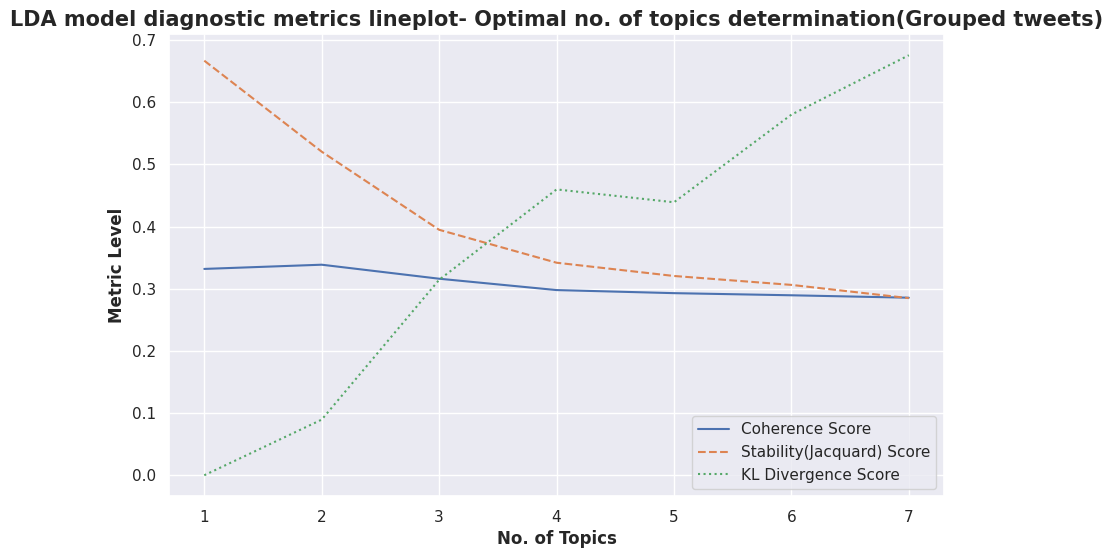

In [129]:
#Plot a line graph for all the LDA metrics for all topics to understand how they change

plt.figure(figsize=(10, 6))

# Plot lines for Coherence Score and Mean_Stability_Jaccqard_Similarity_Score

plt.plot(df_metrics['Topic'], df_metrics['UMass_Coherence_Score'], label = "Coherence Score", linestyle="-")
plt.plot(df_metrics['Topic'], df_metrics['Cluster_Mean_Stability_Jaccqard_Similarity_Score'], label = "Stability(Jacquard) Score", linestyle="--")

# plt.plot(df_metrics['Topic'], df_metrics['Perplexity_Score'], label = "Perplexity Score", linestyle="-.")
plt.plot(df_metrics['Topic'], df_metrics['KL_Divergence_Score'], label = "KL Divergence Score", linestyle=":")

plt.xlabel("No. of Topics", fontweight='bold')
plt.ylabel("Metric Level",fontweight='bold')
plt.title('LDA model diagnostic metrics lineplot- Optimal no. of topics determination(Grouped tweets)', fontsize=15, fontweight='bold')

plt.legend()
plt.show()

In [130]:
#Revising the LDA model to optimal number of clusters based on comparasion of above metrics.

#LDA model creation based on parameters

#1 - Initial LDA model number of topic selection based on heuristics (k=12)
#2 - This LDA Model is based on bag-of words (unigram) approach

#Our objective was to determine the optimal number of topics (clusters) to identify distinct topics with no overlap:
############################################################################################################################################
# Interpretation of metrics for determining optimal number of clusters

#1- UMass Coherence Score
#2 - Mean stability across topics
#3- Perplexity
#4 - KL-Divergence
############################################################################################################################################

#Optimal no. of topics
#Observations:
#1 -

#######################################################################################################################

#1- UMass coherence score for topics

#We see there is no overlap between 3 topics in the entire corpus of 10001 documents, but exceeding that number of topics (=3) is leading to overlap
#between topic clusters


In [131]:
#We will try out here with LDA topics models(with 2 and 3 topics) as deduced from diagnostic metrics to have a comparative evaluation

k = 5
tweets_lda = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 42,
                      passes=1)

print(tweets_lda.show_topics())


[(0, '0.016*"york" + 0.011*"time" + 0.009*"boris" + 0.008*"need" + 0.007*"london" + 0.006*"like" + 0.006*"people" + 0.006*"work" + 0.005*"england" + 0.005*"go"'), (1, '0.013*"london" + 0.012*"people" + 0.008*"labour" + 0.007*"conservatives" + 0.007*"play" + 0.007*"think" + 0.006*"like" + 0.006*"time" + 0.006*"look" + 0.005*"england"'), (2, '0.018*"london" + 0.007*"ticket" + 0.007*"go" + 0.007*"manchester" + 0.007*"time" + 0.006*"think" + 0.006*"live" + 0.005*"want" + 0.005*"unite" + 0.005*"work"'), (3, '0.028*"york" + 0.011*"labour" + 0.009*"england" + 0.006*"time" + 0.006*"go" + 0.005*"city" + 0.005*"london" + 0.005*"come" + 0.005*"support" + 0.005*"look"'), (4, '0.017*"like" + 0.010*"people" + 0.009*"know" + 0.007*"conservatives" + 0.007*"good" + 0.006*"live" + 0.006*"love" + 0.006*"labour" + 0.006*"look" + 0.006*"think"')]


In [132]:
#Check the top dominant topics with their contribution
df_topic_sents_keywords = dominant_topics_keywords_sentences(ldamodel=tweets_lda, corpus=tweets_bow, texts=df['words'])

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

df_dominant_topic = df_dominant_topic[df_dominant_topic['Keywords'].notna()]

df_dominant_topic = df_dominant_topic.sort_values(by='Topic_Perc_Contrib', ascending=False, na_position='first')
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
460,460,0.0,0.9994,"york, time, boris, need, london, like, people,...",[reality]
453,453,2.0,0.9991,"london, ticket, go, manchester, time, think, l...","[darvel, equalise]"
451,451,2.0,0.9990,"london, ticket, go, manchester, time, think, l...","[book, sign, release, book, days]"
445,445,0.0,0.9987,"york, time, boris, need, london, like, people,...","[thousands, european, doctor, shun, job, franc..."
430,430,4.0,0.9981,"like, people, know, conservatives, good, live,...","[rare, german, shepherd, border, collie, puppi..."
...,...,...,...,...,...
67,67,0.0,0.2000,"york, time, boris, need, london, like, people,...","[jump, nightclub, surely, clean, tidy, space, ..."
8,8,0.0,0.2000,"york, time, boris, need, london, like, people,...","[jouvenel, sovereignty, fable, babylon, city, ..."
71,71,0.0,0.2000,"york, time, boris, need, london, like, people,...","[tory, sleaze, corruption, threaten, global, r..."
7,7,0.0,0.2000,"york, time, boris, need, london, like, people,...","[check, snake, eye, check, item, etsy, shop, w..."


In [133]:
#Displaying the topics and their contribution to different documents

df_dominant_t_plot = df_dominant_topic[['Document_No','Dominant_Topic', 'Topic_Perc_Contrib']]
df_dominant_t_plot_1 = df_dominant_t_plot.drop_duplicates()
df_dominant_t_plot_1

,Document_No,Dominant_Topic,Topic_Perc_Contrib
460,460,0.0,0.9994
453,453,2.0,0.9991
451,451,2.0,0.9990
445,445,0.0,0.9987
430,430,4.0,0.9981
...,...,...,...
67,67,0.0,0.2000
8,8,0.0,0.2000
71,71,0.0,0.2000
7,7,0.0,0.2000


In [134]:
# toptopics= df_dominant_topic.groupby('Topic_Perc_Contrib').size().sort_values(ascending=False).reset_index()
#Visualizing top 10 words in each topic in terms of their topic contribution probablity value

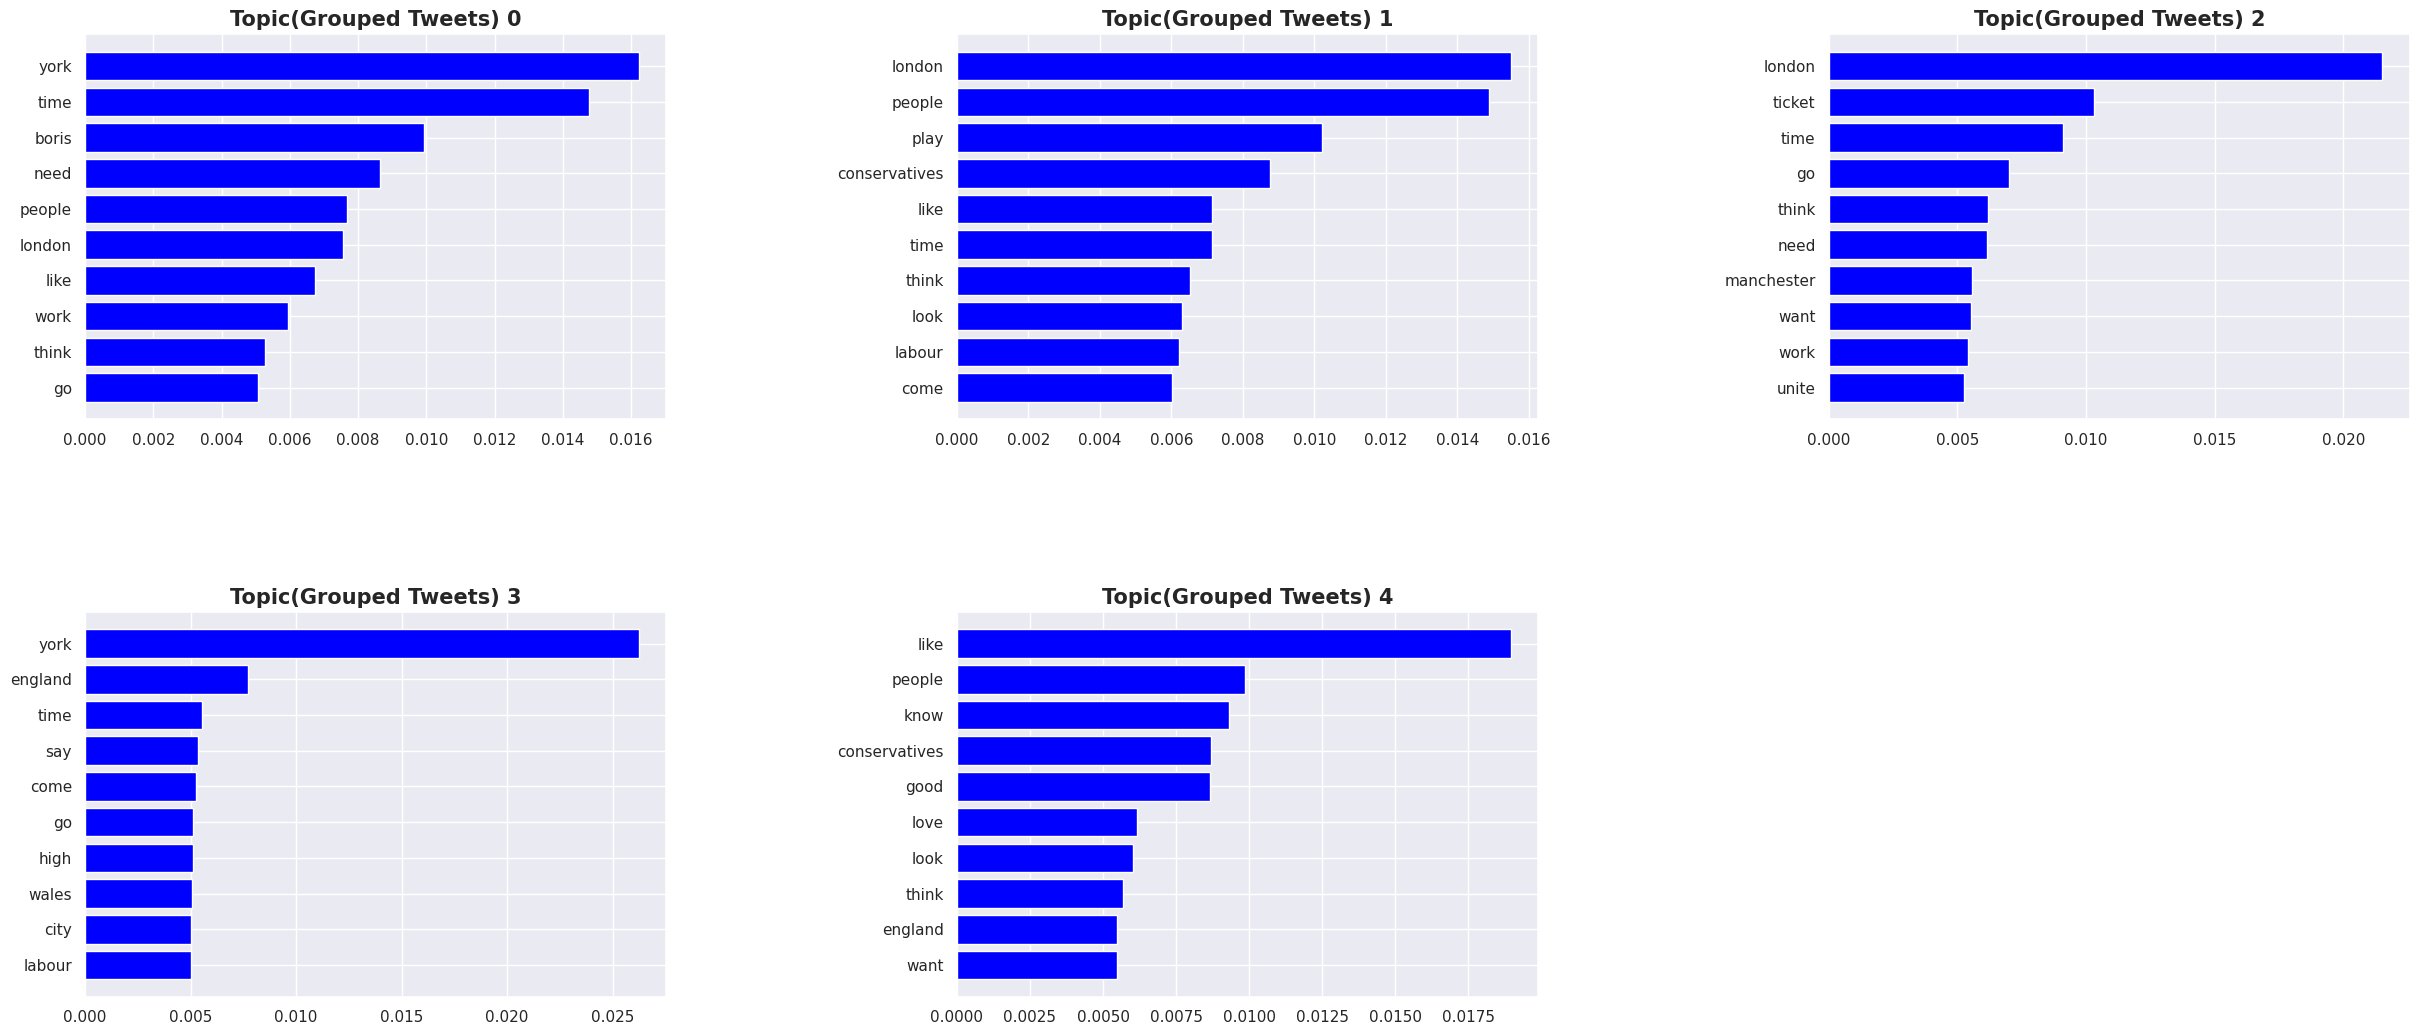

In [135]:
plot_topicwise_top_words(nb_topics = k)

In [136]:
#LDA bubble plot for visualizing the final LDA model with optimal number of topics(k=5 topics)

In [137]:
# import pyLDAvis.gensim

import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(tweets_lda, tweets_bow, dictionary=tweets_lda.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.020568  0.018566       1        1  24.284716
3     -0.026256  0.010054       2        1  22.470258
4      0.006901 -0.018249       3        1  21.926871
0     -0.008576 -0.005296       4        1  18.676873
1      0.007363 -0.005075       5        1  12.641281, topic_info=        Term        Freq       Total Category  logprob  loglift
184     york  753.000000  753.000000  Default  30.0000  30.0000
64    london  673.000000  673.000000  Default  29.0000  29.0000
528   people  461.000000  461.000000  Default  28.0000  28.0000
538    boris  236.000000  236.000000  Default  27.0000  27.0000
308     like  548.000000  548.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
165     know   30.878873  375.879171   Topic5  -5.6718  -0.4310
1645    need   29.815553  320.444696   Topic5  -5.7068  -0.3065
783   ticket   27.044169  188.167080   Topic5  -5.8044   0.1283
184     york   32.575937  753.235231   Topic5  -5.6183  -1.0726
1008   right   28.176573  264.406746   Topic5  -5.7633  -0.1708

[375 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1010      1  0.162814  able
1010      2  0.203518  able
1010      3  0.183166  able
1010      4  0.345980  able
1010      5  0.101759  able
...     ...       ...   ...
184       1  0.037173  york
184       2  0.585474  york
184       3  0.054432  york
184       4  0.278797  york
184       5  0.043811  york

[1242 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 5, 1, 2])